<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/ML_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General
Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data.
In most of the situations we want to have a machine learning system to make **predictions**, so we have several categories of machine learning tasks depending on the type of prediction needed: **Classification, Regression, Clustering, Generation**, etc.

**Classification** is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs).
**Regression** is the task whose goal is the prediction of numerical value(s) related to the input (e.g., House rent prediction, Estimated time of arrival ).
**Generation** is the task whose goal is the creation of something new related to the input (e.g., Text translation, Audio beat generation, Image denoising ). **Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar (in some sense) to each other than to those in other **clusters** (e.g., Clients clutering).

In machine learning, there are learning paradigms that relate to one aspect of the dataset: **the presence of the label to be predicted**. **Supervised Learning** is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as ` y variables`. **Unsupervised Learning** is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. **Self-supervised Learning** is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

## Notebook overview

This notebook is a guide to start practicing Machine Learning.

# **Customer Churn Prediction Challenge For Azubian**

## **Project Statement of the Problem**:
The problem is centered around customer churn prediction for an African telecommunications company that offers airtime and mobile data bundles. The company wants to develop a machine learning model that can accurately predict the likelihood of each customer "churning" – becoming inactive and not making any transactions for 90 days. Churn prediction is crucial for the company's success as it enables proactive measures to retain customers and reduce revenue loss.

## **Project Objective**:
The objective of this challenge is to develop a machine learning model to predict the likelihood of each customer “churning,” i.e. becoming inactive and not making any transactions for 90 days.

## Hypothesis

**Null hypothesis(H0)**: There is no significant relationship between the customers' characteristics and the churn rate. In other words, the variables in the dataset have no impact on customer churn.

**Alternative hypothesisH1)**: There is a significant relationship between the customers' characteristics and the churn rate. The variables in the dataset have an impact on customer churn.

## **Business Questions**

#### 1.  What is the overall churn rate of the company?

#### 2. Which region has the highest representation?

#### 3. Which tenure has the highest representation?

#### 4. Does the length of tenure (months) affect the churn rate of customers?

#### 5. Which Region has most clients churning?

#### 6. Do client churn or not churn if active for 90 days (Regularity)?

#### 7. What's the correlation between the various features?


# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# !pip install -q <lib_001> <lib_002> ...
%pip install imbalanced-learn
%pip install transformers
%pip install --upgrade huggingface_hub
%pip install huggingface-cli


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement huggingface-cli (from versions: none)
ERROR: No matching distribution found for huggingface-cli


## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:
# Data handling
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr


# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.plotting import scatter_matrix

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import imblearn
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import confusion_matrix , classification_report, f1_score, accuracy_score,\
precision_score, recall_score, fbeta_score, make_scorer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE



# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import GridSearchCV

# Other packages
import os
import pickle
#importing warning
import warnings
warnings.filterwarnings('ignore')

# Connect to Hugging Face
from transformers import AutoModel
from huggingface_hub import login

#Others
from google.colab import files


In [3]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Disable pandas warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [5]:
# Load data
train_data=pd.read_csv('drive/My Drive/Colab Notebooks/Train.csv')
test_data=pd.read_csv('drive/My Drive/Colab Notebooks/Test.csv')
submission=pd.read_csv('drive/My Drive/Colab Notebooks/SampleSubmission.csv')
variabledefinitions=pd.read_csv('drive/My Drive/Colab Notebooks/VariableDefinitions.csv')

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [6]:
# check train data
train_data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


In [7]:
# check test data
test_data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0


In [8]:
#check submission file
submission.head()

,user_id,CHURN
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,0
2,5a4db591c953a8d8f373877fad37aaf4268899a1,0
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,0
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,0


In [9]:
#check variable definitions
variabledefinitions

,Variable Definitions,Unnamed: 1,Unnamed: 2
0,NaN,French,English
1,NaN,Le dataset churn comprend 19 variables dont 15...,The churn dataset includes 19 variables includ...
2,user_id,NaN,NaN
3,REGION,la localité de chaque client,the location of each client
4,TENURE,la durée dans le reseau,duration in the network
5,MONTANT,montant de recharge,top-up amount
6,FREQUENCE_RECH,nombre de fois que le client a fait une recharge,number of times the customer refilled
7,REVENUE,revenu mensuel de chaque client,monthly income of each client
8,ARPU_SEGMENT,revenu sur 90 jours/3,income over 90 days / 3
9,FREQUENCE,nombre de fois que client à fait un revenu,number of times the client has made an income


### Pre-processing train data

In [10]:
#making a copy of the train data for exploration
train_copy=train_data.copy()
train_copy.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


In [11]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

In [12]:
#check shape of data
train_copy.shape

(1077024, 19)

In [13]:
#check null values
train_copy.isnull().sum()

user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

In [14]:
#check percentage of missing values
missing_values_percentage = (train_copy.isnull().sum() / len(train_copy)) * 100
missing_values_percentage

user_id            0.000000
REGION            39.399029
TENURE             0.000000
MONTANT           35.086033
FREQUENCE_RECH    35.086033
REVENUE           33.644097
ARPU_SEGMENT      33.644097
FREQUENCE         33.644097
DATA_VOLUME       49.187669
ON_NET            36.505593
ORANGE            41.516624
TIGO              59.866261
ZONE1             92.117353
ZONE2             93.612584
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          41.864898
FREQ_TOP_PACK     41.864898
CHURN              0.000000
dtype: float64

In [15]:
#check for duplicates
train_copy.duplicated().sum()

0

In [16]:
#check unique values
train_copy.nunique()

user_id           1077024
REGION                 14
TENURE                  8
MONTANT              4357
FREQUENCE_RECH        119
REVENUE             31810
ARPU_SEGMENT        14062
FREQUENCE              91
DATA_VOLUME         32459
ON_NET               8202
ORANGE               2674
TIGO                 1105
ZONE1                 482
ZONE2                 394
MRG                     1
REGULARITY             62
TOP_PACK              126
FREQ_TOP_PACK         206
CHURN                   2
dtype: int64

In [17]:
#renaming columns
train_copy.rename(columns={
    'user_id': 'User ID',
    'REGION': 'Region',
    'TENURE': 'Tenure',
    'MONTANT': 'Recharge_Amount',
    'FREQUENCE_RECH': 'Recharge_Frequency',
    'REVENUE': 'Revenue',
    'ARPU_SEGMENT': 'ARPU_Segment',
    'FREQUENCE': 'Income_Frequency',
    'DATA_VOLUME': 'Data_Volume',
    'ON_NET': 'On_Net',
    'ORANGE': 'Orange',
    'TIGO': 'Tigo',
    'ZONE1': 'Zone1',
    'ZONE2': 'Zone2',
    'REGULARITY': 'Regularity',
    'TOP_PACK': 'Top_Pack',
    'FREQ_TOP_PACK': 'Frequency_Top_Pack',
    'CHURN': 'Churn'
}, inplace=True)
train_copy.head()

,User ID,Region,Tenure,Recharge_Amount,Recharge_Frequency,Revenue,ARPU_Segment,Income_Frequency,Data_Volume,On_Net,Orange,Tigo,Zone1,Zone2,MRG,Regularity,Top_Pack,Frequency_Top_Pack,Churn
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


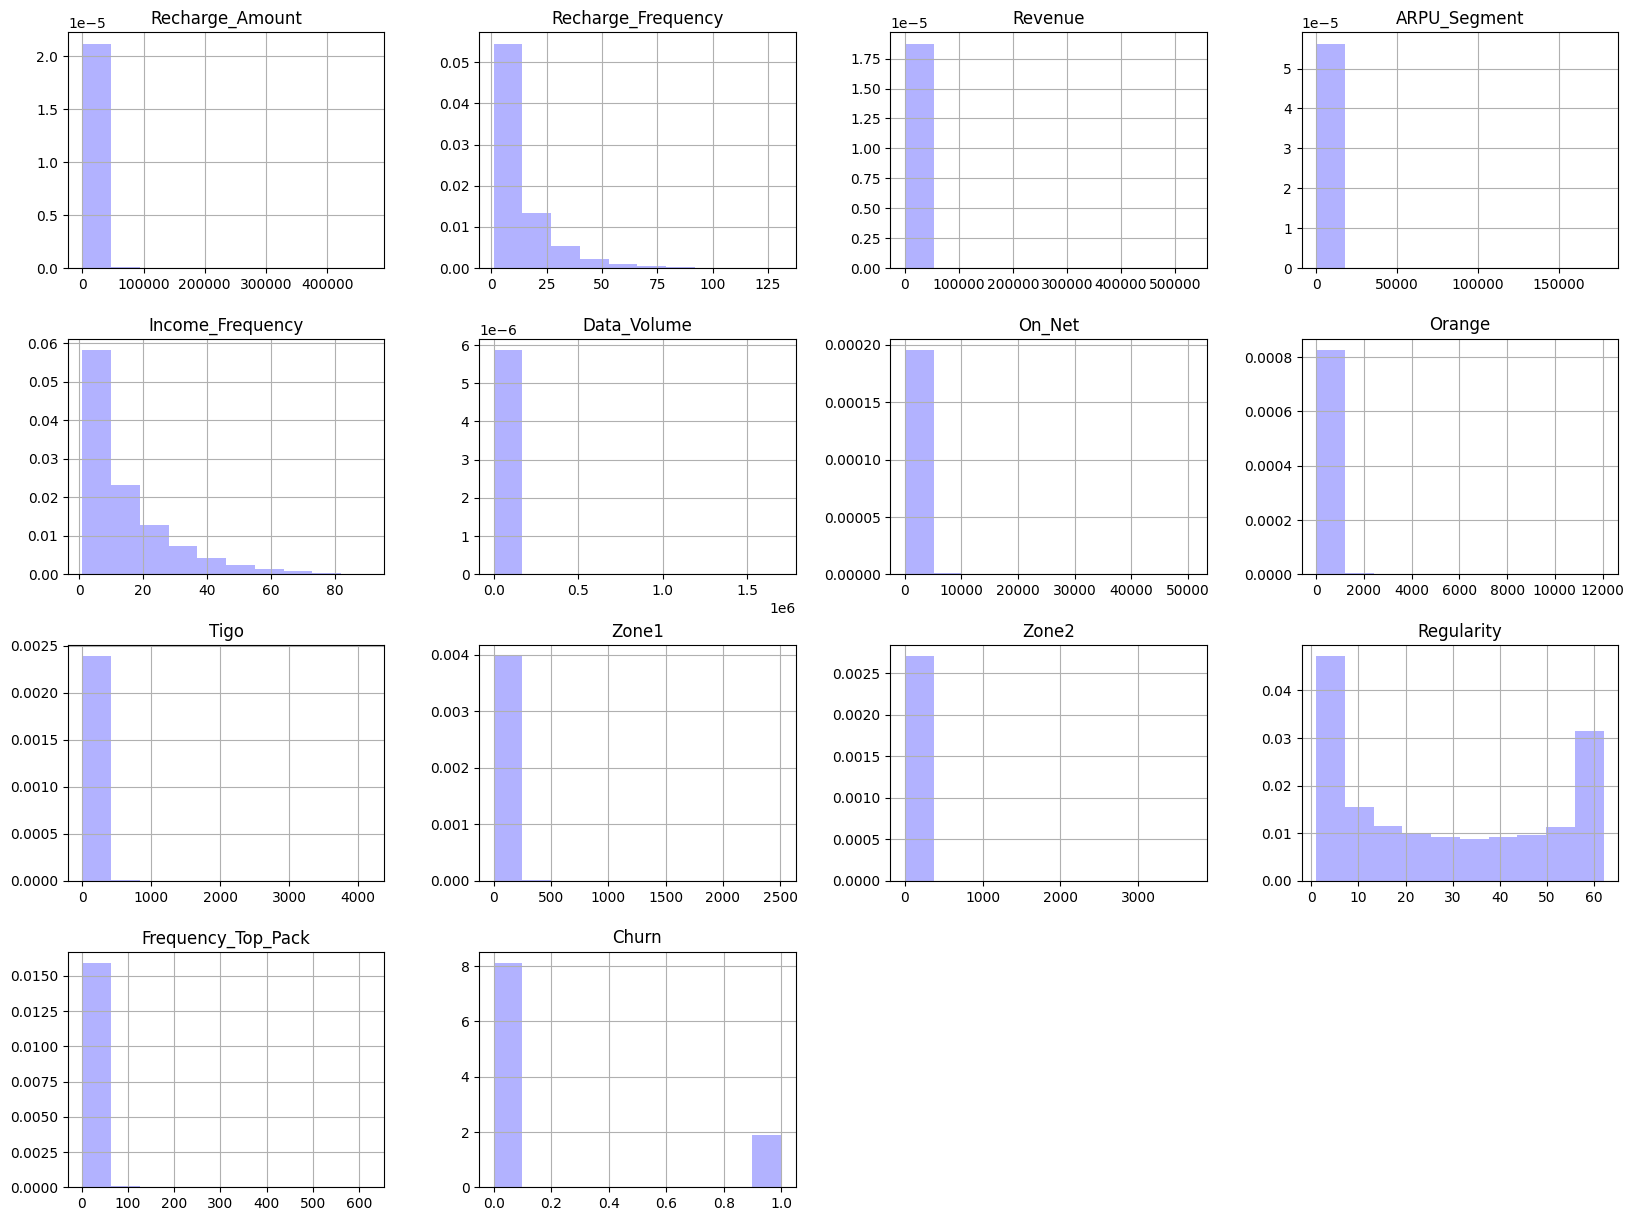

In [18]:
#checking how the values are distributed in all the columns
train_copy.hist(alpha=0.3, color='b', density=True, figsize=(20,15))
plt.show()

In [19]:
#check Skewness of the various columns

# Select the relevant columns for skewness calculation
columns = ['Recharge_Amount', 'Recharge_Frequency', 'Revenue', 'ARPU_Segment', 'Income_Frequency',
            'Data_Volume', 'On_Net', 'Orange', 'Tigo', 'Zone1', 'Zone2', 'Regularity', 'Frequency_Top_Pack', 'Churn']

# Calculate skewness for each column
skewness = train_copy[columns].skew()

# check the skewness values
skewness

Recharge_Amount        4.405223
Recharge_Frequency     2.112860
Revenue                4.385562
ARPU_Segment           4.385577
Income_Frequency       1.776850
Data_Volume           33.606661
On_Net                 8.358706
Orange                 7.301204
Tigo                  13.233105
Zone1                 18.652712
Zone2                 36.728659
Regularity             0.247234
Frequency_Top_Pack     3.905091
Churn                  1.600886
dtype: float64

#### **Observation**
**1. Recharge_Amount**: The feature has a positive skewness value of **4.405223**, indicating a **right-skewed distribution**. This means that the majority of values are concentrated towards the lower end, and there are some high-value outliers.

**2. Recharge_Frequency**: The feature has a positive skewness value of **2.112860**, indicating a **right-skewed distribution**. This suggests that the majority of customers have a lower frequency of recharging, with some customers having a high frequency.

**3. Revenue**: The feature has a positive skewness value of **4.385562**, indicating a **right-skewed distribution**. This implies that most of the revenue values are concentrated towards the lower end, and there might be some high revenue outliers.

**4. ARPU_Segment**: The feature has a positive skewness value of **4.385577**, indicating a **right-skewed distribution**. This means that the majority of customers have a lower ARPU (Average Revenue Per User) segment, with some customers having a higher ARPU.

**5.Income_Frequency**: The feature has a positive skewness value of **1.776850**, indicating a **right-skewed distribution**. This suggests that the majority of customers have a lower frequency of activity, and there are some customers with a higher frequency.

**6. Data_Volume**: The feature has a positive skewness value of **33.606661**, indicating a **heavily right-skewed distribution**. This implies that most of the data volume values are concentrated towards the lower end, and there might be some extremely high outliers.

**7. On_Net**: The feature has a positive skewness value of **8.358706**, indicating a **right-skewed distribution**. This suggests that the majority of on-net (same network) communication values are lower, and there might be some high-value outliers.

**8. Orange**: The feature has a positive skewness value of **7.301204**, indicating a **right-skewed distribution**. This means that the majority of Orange network communication values are lower, and there might be some high outliers.

**9. Tigo**: The feature has a positive skewness value of **13.233105**, indicating a **right-skewed distribution**. This means that the majority of Tigo network communication values are lower, and there might be some high outliers.

**10. Zone1**: The feature has a positive skewness value of **18.652712**, indicating a **right-skewed distribution**. This means that the majority of Zone1 network communication values are lower, and there might be some high outliers.

**11. Zone2**: The feature has a positive skewness value of **36.728659**, indicating a **right-skewed distribution**. This means that the majority of Zone2 network communication values are lower, and there might be some high outliers.

**12. Regularity**: The feature has a positive skewness value of **0.247234**, indicating a **slightly right-skewed distribution**. This suggests that the majority of customers have a regularity level towards the lower end, but the skewness is not significant.

**13. Frequency_Top_Pack**: The feature has a positive skewness value of **3.905091**, indicating a **right-skewed distribution**. This implies that the majority of customers have a lower frequency of using the top pack, with some customers having a higher frequency.

**14. Churn**: The feature has a positive skewness value of **1.600886**, indicating a **right-skewed distribution**. This means that the majority of customers are less likely to churn, with fewer customers having a higher likelihood of churn.

#### Replacing null values

In [20]:
#selecting the mode in the these categorical columns
mode_top_pack = train_copy['Top_Pack'].mode()[0]
mode_region = train_copy['Region'].mode()[0]

In [21]:
#filling the null values with the mode
train_copy['Top_Pack'].fillna(mode_top_pack, inplace=True)
train_copy['Region'].fillna(mode_region, inplace=True)

In [22]:

#filling the null values in the numerical values with the median
skewed_features=['Recharge_Amount', 'Recharge_Frequency', 'Revenue', 'ARPU_Segment', 'Income_Frequency',
            'Data_Volume', 'On_Net', 'Orange', 'Tigo', 'Zone1', 'Zone2', 'Regularity', 'Frequency_Top_Pack']

for feature in skewed_features:
    median_value = train_copy[feature].median()
    train_copy[feature].fillna(median_value, inplace=True)

In [23]:
#rechecking for null values after performing various operations
train_copy.isnull().sum()

User ID               0
Region                0
Tenure                0
Recharge_Amount       0
Recharge_Frequency    0
Revenue               0
ARPU_Segment          0
Income_Frequency      0
Data_Volume           0
On_Net                0
Orange                0
Tigo                  0
Zone1                 0
Zone2                 0
MRG                   0
Regularity            0
Top_Pack              0
Frequency_Top_Pack    0
Churn                 0
dtype: int64

In [24]:
# Generate descriptive statistics of the churn_train DataFrame
train_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Recharge_Amount,1077024.0,4641.811117,5850.106520,20.0,2000.0,3000.0,4600.0,470000.0
Recharge_Frequency,1077024.0,9.936549,10.900959,1.0,4.0,7.0,10.0,131.0
Revenue,1077024.0,4662.912635,5963.927860,1.0,1900.0,3000.0,4700.0,532177.0
ARPU_Segment,1077024.0,1554.307990,1987.973213,0.0,633.0,1000.0,1567.0,177392.0
Income_Frequency,1077024.0,12.300834,12.192635,1.0,6.0,9.0,13.0,91.0
Data_Volume,1077024.0,1838.670868,9325.304670,0.0,232.0,258.0,293.0,1702309.0
On_Net,1077024.0,185.777795,707.009825,0.0,12.0,27.0,55.0,50809.0
Orange,1077024.0,67.693072,158.644324,0.0,20.0,29.0,41.0,12040.0
Tigo,1077024.0,12.864883,41.424575,0.0,6.0,6.0,6.0,4174.0
Zone1,1077024.0,1.564987,11.186628,0.0,1.0,1.0,1.0,2507.0


**Recharge_Amount** : Average spending is  4,641.8 dollars, ranging from 20 dollars to 470,000 dollars.

**Recharge Frequency**: Customers recharge their accounts approximately 9.93 times on average, with a range of 1 to 131.

**Revenue**: Average revenue generated is 4,662.9 dollars, ranging from 1 dollar to 532,177 dollars.

**ARPU Segment**: Average ARPU segment is 1,554.3 dollars, ranging from 0 dollars to 177,392 dollars.

**Income_Frequency**: Average service usage frequency is 12.3, ranging from 1 to 91.

**Data Volume**: Average data volume consumed is 1,838.67, ranging from 0 to 1,702,309.

**On-net**: Average on-net connections are 185.77, ranging from 0 to 50,809.

**Orange**: Average Orange network connections are 67.69, ranging from 0 to 12,040.

**Tigo**: Average Tigo network connections are 12.86, ranging from 0 to 4,174.

**Zone1**: Average Zone 1 connections are 1.56, ranging from 0 to 2,507.

**Zone2**: Average Zone 2 connections are 2.36, ranging from 0 to 3,697.

**Regularity**: Average usage duration is 28.04 months, ranging from 1 to 62 months.

**Frequency_Top_Pack**: Average usage frequency of the top pack is 7.47, ranging from 1 to 624.

**Churn**: Approximately 18.75% of customers have churned, while 81.25% are active.



### Pre-processing test data

In [25]:
#check test data
test_data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0


In [26]:
#check shape
test_data.shape

(190063, 18)

In [27]:
#check data info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190063 entries, 0 to 190062
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         190063 non-null  object 
 1   REGION          115330 non-null  object 
 2   TENURE          190063 non-null  object 
 3   MONTANT         123695 non-null  float64
 4   FREQUENCE_RECH  123695 non-null  float64
 5   REVENUE         126422 non-null  float64
 6   ARPU_SEGMENT    126422 non-null  float64
 7   FREQUENCE       126422 non-null  float64
 8   DATA_VOLUME     96716 non-null   float64
 9   ON_NET          120771 non-null  float64
 10  ORANGE          111417 non-null  float64
 11  TIGO            76555 non-null   float64
 12  ZONE1           14850 non-null   float64
 13  ZONE2           12011 non-null   float64
 14  MRG             190063 non-null  object 
 15  REGULARITY      190063 non-null  int64  
 16  TOP_PACK        110773 non-null  object 
 17  FREQ_TOP_P

In [28]:
#check null values
test_data.isnull().sum()

user_id                0
REGION             74733
TENURE                 0
MONTANT            66368
FREQUENCE_RECH     66368
REVENUE            63641
ARPU_SEGMENT       63641
FREQUENCE          63641
DATA_VOLUME        93347
ON_NET             69292
ORANGE             78646
TIGO              113508
ZONE1             175213
ZONE2             178052
MRG                    0
REGULARITY             0
TOP_PACK           79290
FREQ_TOP_PACK      79290
dtype: int64

In [29]:
#check percentage of missing values
missing_values_percentage = (test_data.isnull().sum() / len(test_data)) * 100
missing_values_percentage

user_id            0.000000
REGION            39.320120
TENURE             0.000000
MONTANT           34.918948
FREQUENCE_RECH    34.918948
REVENUE           33.484161
ARPU_SEGMENT      33.484161
FREQUENCE         33.484161
DATA_VOLUME       49.113715
ON_NET            36.457385
ORANGE            41.378911
TIGO              59.721250
ZONE1             92.186801
ZONE2             93.680516
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          41.717746
FREQ_TOP_PACK     41.717746
dtype: float64

In [30]:
#check for duplicates
test_data.duplicated().sum()

0

In [31]:
#check unique values
test_data.nunique()

user_id           190063
REGION                14
TENURE                 8
MONTANT             1705
FREQUENCE_RECH       106
REVENUE            18060
ARPU_SEGMENT        8889
FREQUENCE             91
DATA_VOLUME        15902
ON_NET              4586
ORANGE              1643
TIGO                 638
ZONE1                247
ZONE2                203
MRG                    1
REGULARITY            62
TOP_PACK              98
FREQ_TOP_PACK        145
dtype: int64

In [32]:
#renaming columns
test_data.rename(columns={
    'user_id': 'User ID',
    'REGION': 'Region',
    'TENURE': 'Tenure',
    'MONTANT': 'Recharge_Amount',
    'FREQUENCE_RECH': 'Recharge_Frequency',
    'REVENUE': 'Revenue',
    'ARPU_SEGMENT': 'ARPU_Segment',
    'FREQUENCE': 'Income_Frequency',
    'DATA_VOLUME': 'Data_Volume',
    'ON_NET': 'On_Net',
    'ORANGE': 'Orange',
    'TIGO': 'Tigo',
    'ZONE1': 'Zone1',
    'ZONE2': 'Zone2',
    'REGULARITY': 'Regularity',
    'TOP_PACK': 'Top_Pack',
    'FREQ_TOP_PACK': 'Frequency_Top_Pack',
}, inplace=True)
test_data.head()

,User ID,Region,Tenure,Recharge_Amount,Recharge_Frequency,Revenue,ARPU_Segment,Income_Frequency,Data_Volume,On_Net,Orange,Tigo,Zone1,Zone2,MRG,Regularity,Top_Pack,Frequency_Top_Pack
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0


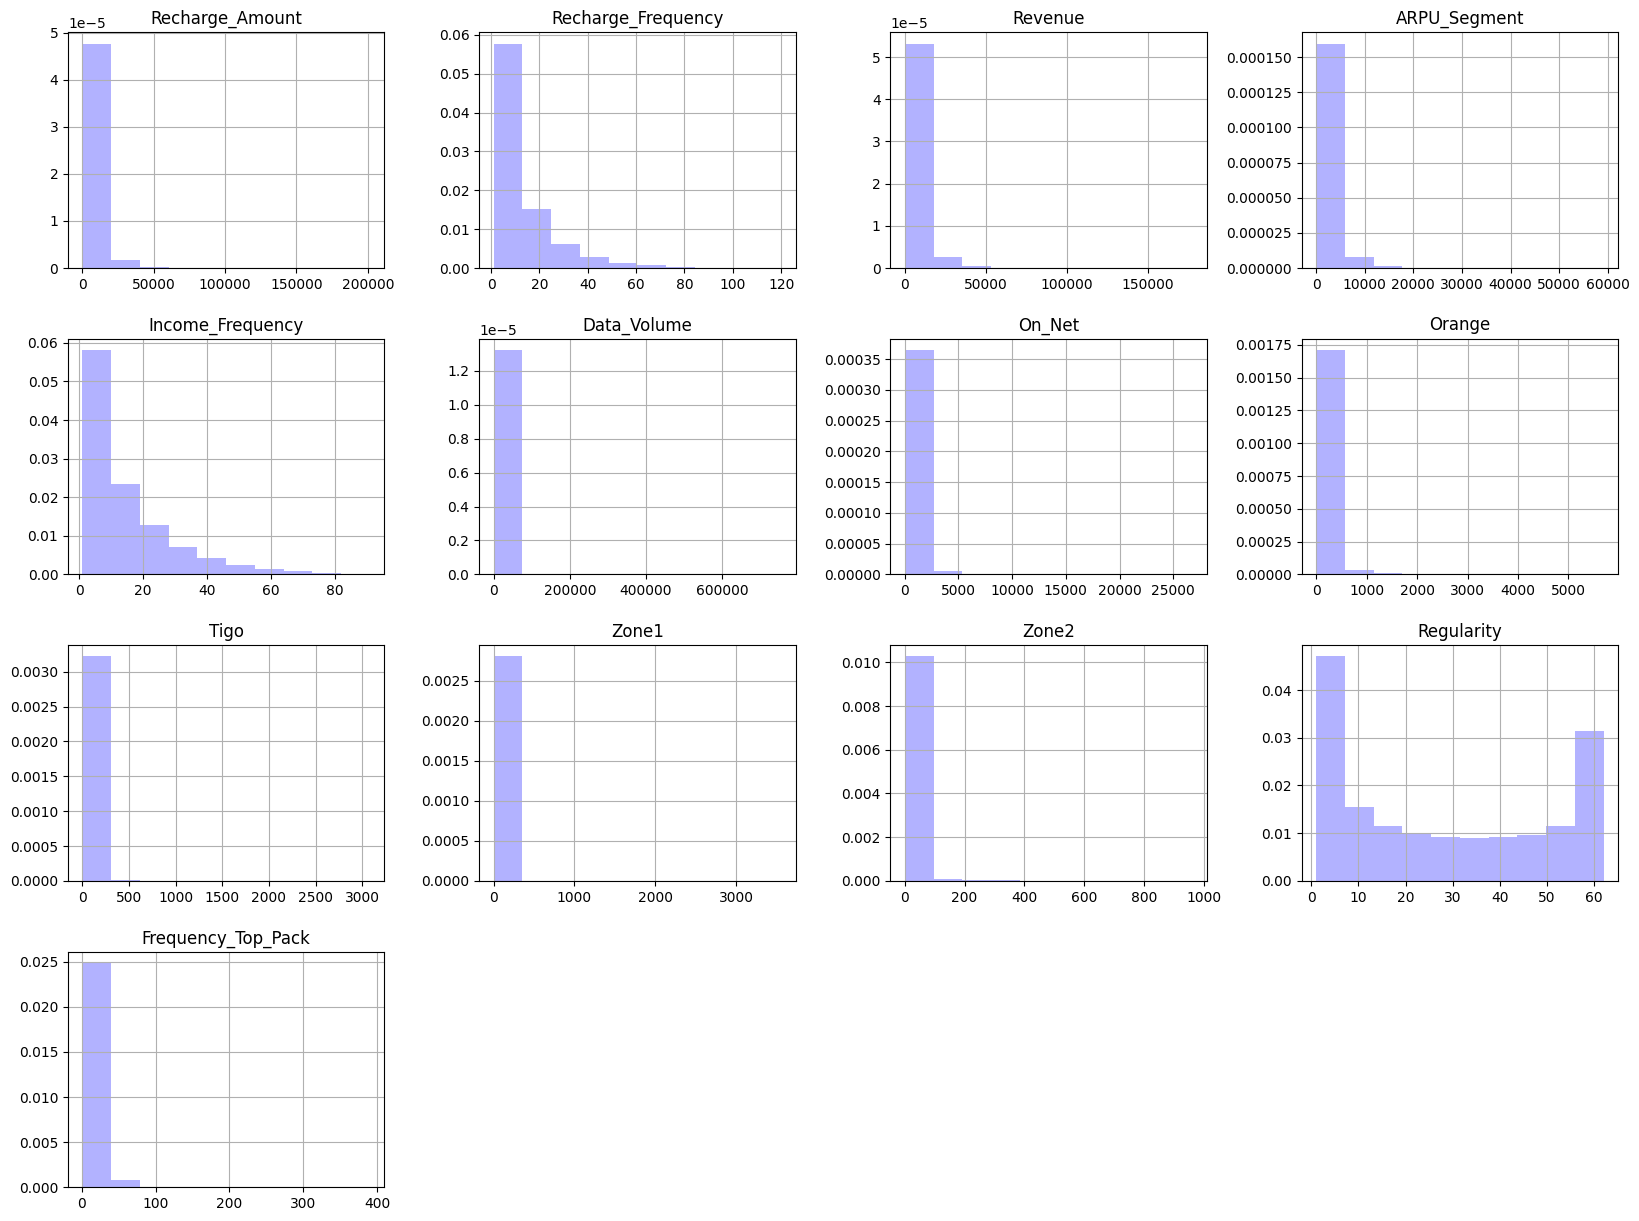

In [33]:
#checking how the values are distributed in all the columns
test_data.hist(alpha=0.3, color='b', density=True, figsize=(20,15))
plt.show()

In [34]:
#check Skewness of the various columns

# Select the relevant columns for skewness calculation
columns = ['Recharge_Amount', 'Recharge_Frequency', 'Revenue', 'ARPU_Segment', 'Income_Frequency',
            'Data_Volume', 'On_Net', 'Orange', 'Tigo', 'Zone1', 'Zone2', 'Regularity', 'Frequency_Top_Pack']

# Calculate skewness for each column
skewness = test_data[columns].skew()

# check the skewness values
skewness

Recharge_Amount        3.907768
Recharge_Frequency     2.122843
Revenue                3.629769
ARPU_Segment           3.629783
Income_Frequency       1.786777
Data_Volume           23.974699
On_Net                 7.715535
Orange                 7.080592
Tigo                  13.641521
Zone1                 37.863336
Zone2                 13.721513
Regularity             0.242688
Frequency_Top_Pack     3.513308
dtype: float64

#### **Observation**
**1. Recharge_Amount**: The feature has a positive skewness value of **3.907768**, indicating a **right-skewed distribution**. This means that the majority of values are concentrated towards the lower end, and there are some high-value outliers.

**2. Recharge_Frequency**: The feature has a positive skewness value of **2.122843**, indicating a **right-skewed distribution**. This suggests that the majority of customers have a lower frequency of recharging, with some customers having a high frequency.

**3. Revenue**: The feature has a positive skewness value of **3.629769**, indicating a **right-skewed distribution**. This implies that most of the revenue values are concentrated towards the lower end, and there might be some high revenue outliers.

**4. ARPU_Segment**: The feature has a positive skewness value of **3.629783**, indicating a **right-skewed distribution**. This means that the majority of customers have a lower ARPU (Average Revenue Per User) segment, with some customers having a higher ARPU.

**5.Income_Frequency**: The feature has a positive skewness value of **1.786777**, indicating a **right-skewed distribution**. This suggests that the majority of customers have a lower frequency of activity, and there are some customers with a higher frequency.

**6. Data_Volume**: The feature has a positive skewness value of **23.974699**, indicating a **heavily right-skewed distribution**. This implies that most of the data volume values are concentrated towards the lower end, and there might be some extremely high outliers.

**7. On_Net**: The feature has a positive skewness value of **7.715535**, indicating a **right-skewed distribution**. This suggests that the majority of on-net (same network) communication values are lower, and there might be some high-value outliers.

**8. Orange**: The feature has a positive skewness value of **7.080592**, indicating a **right-skewed distribution**. This means that the majority of Orange network communication values are lower, and there might be some high outliers.

**9. Tigo**: The feature has a positive skewness value of **13.641521**, indicating a **right-skewed distribution**. This means that the majority of Tigo network communication values are lower, and there might be some high outliers.

**10. Zone1**: The feature has a positive skewness value of **37.863336**, indicating a **right-skewed distribution**. This means that the majority of Zone1 network communication values are lower, and there might be some high outliers.

**11. Zone2**: The feature has a positive skewness value of **13.721513**, indicating a **right-skewed distribution**. This means that the majority of Zone2 network communication values are lower, and there might be some high outliers.

**12. Regularity**: The feature has a positive skewness value of **0.242688**, indicating a **slightly right-skewed distribution**. This suggests that the majority of customers have a regularity level towards the lower end, but the skewness is not significant.

**13. Frequency_Top_Pack**: The feature has a positive skewness value of **3.513308**, indicating a **right-skewed distribution**. This implies that the majority of customers have a lower frequency of using the top pack, with some customers having a higher frequency.

#### Replacing null values in test data

In [35]:
#selecting the mode in the these categorical columns
mode_top_pack = test_data['Top_Pack'].mode()[0]
mode_region = test_data['Region'].mode()[0]

In [36]:
#filling the null values with the mode
test_data['Top_Pack'].fillna(mode_top_pack, inplace=True)
test_data['Region'].fillna(mode_region, inplace=True)

In [37]:
#filling the null values in the numerical values with the median
skewed_features=['Recharge_Amount', 'Recharge_Frequency', 'Revenue', 'ARPU_Segment', 'Income_Frequency',
            'Data_Volume', 'On_Net', 'Orange', 'Tigo', 'Zone1', 'Zone2', 'Regularity', 'Frequency_Top_Pack']

for feature in skewed_features:
    median_value = test_data[feature].median()
    test_data[feature].fillna(median_value, inplace=True)

In [38]:
#rechecking for null values after performing various operations
test_data.isnull().sum()

User ID               0
Region                0
Tenure                0
Recharge_Amount       0
Recharge_Frequency    0
Revenue               0
ARPU_Segment          0
Income_Frequency      0
Data_Volume           0
On_Net                0
Orange                0
Tigo                  0
Zone1                 0
Zone2                 0
MRG                   0
Regularity            0
Top_Pack              0
Frequency_Top_Pack    0
dtype: int64

In [39]:
# Generate descriptive statistics of test DataFrame
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Recharge_Amount,190063.0,4631.287652,5821.942699,25.0,2000.0,3000.0,4600.0,201500.0
Recharge_Frequency,190063.0,9.918196,10.846745,1.0,4.0,7.0,10.0,120.0
Revenue,190063.0,4653.739029,5932.674143,1.0,1900.0,3000.0,4701.0,177322.0
ARPU_Segment,190063.0,1551.250207,1977.555476,0.0,633.0,1000.0,1567.0,59107.0
Income_Frequency,190063.0,12.285663,12.152128,1.0,6.0,9.0,13.0,91.0
Data_Volume,190063.0,1839.127105,8715.607765,0.0,235.0,265.0,302.0,754798.0
On_Net,190063.0,188.532071,717.172045,0.0,12.0,27.0,56.0,26786.0
Orange,190063.0,67.048468,158.546352,0.0,20.0,28.0,41.0,5695.0
Tigo,190063.0,12.828162,42.021164,0.0,6.0,6.0,6.0,3083.0
Zone1,190063.0,1.557505,13.013360,0.0,1.0,1.0,1.0,3558.0


## Answering Business Questions

### Univariate Analysis

#### 1.  What is the overall churn rate of the company?

0    875031
1    201993
Name: Churn, dtype: int64


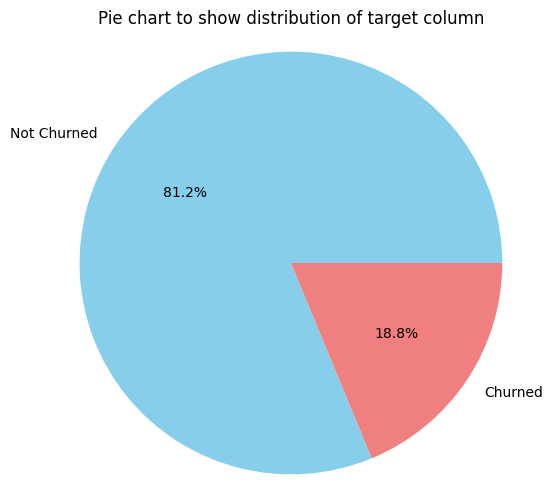

In [40]:
#count the values in the churn column
print(train_copy['Churn'].value_counts())
target_count=train_copy['Churn'].value_counts()

#create a pie chart
plt.figure(figsize=(6,6))
plt.pie(target_count, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.axis('equal')
plt.title('Pie chart to show distribution of target column');

> - The target column ('churn') is imbalanced with majority (81.2%) not churning.

#### 2. Which Region has the highest representation?

DAKAR          680596
THIES           90171
SAINT-LOUIS     59895
LOUGA           49679
KAOLACK         48498
DIOURBEL        33564
TAMBACOUNDA     27562
KAFFRINE        22067
KOLDA           19464
FATICK          17775
MATAM           14650
ZIGUINCHOR      11036
SEDHIOU          1553
KEDOUGOU          514
Name: Region, dtype: int64


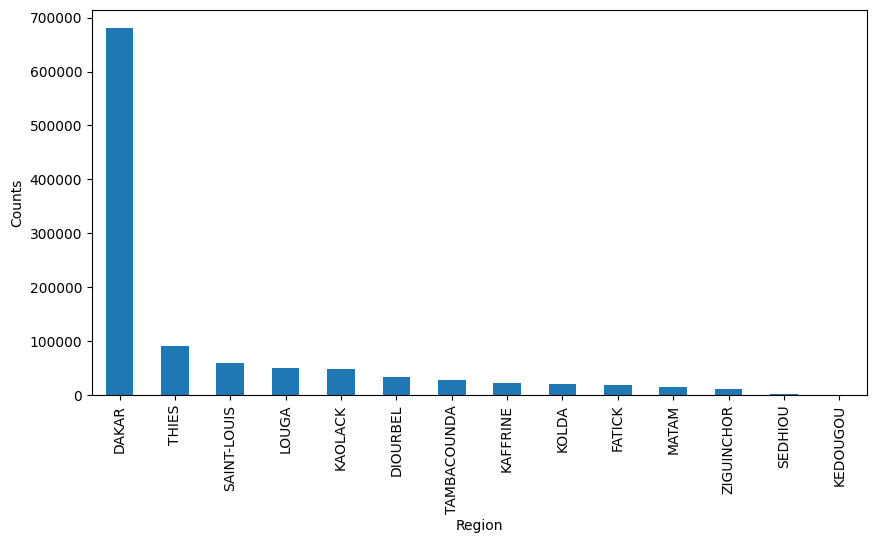

In [41]:
#plot a bar chart to visualize Regions
print(train_copy['Region'].value_counts())
plt.figure(figsize=(10,5))
train_copy['Region'].value_counts().plot(kind='bar')
plt.ylabel('Counts')
plt.xlabel('Region');

> - Dakar region has most clients (680,596).

#### 3. Which tenure has the highest representation?

K > 24 month     1021853
I 18-21 month      22494
H 15-18 month      12913
G 12-15 month       7520
J 21-24 month       6324
F 9-12 month        4604
E 6-9 month          929
D 3-6 month          387
Name: Tenure, dtype: int64


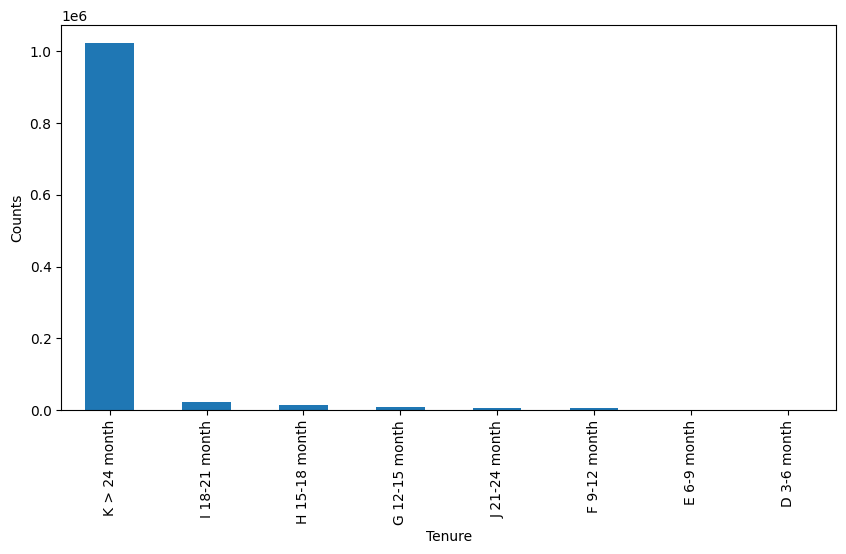

In [42]:
#plot a bar chart to visualize Tenure column
print(train_copy['Tenure'].value_counts())
plt.figure(figsize=(10,5))
train_copy['Tenure'].value_counts().plot(kind='bar')
plt.ylabel('Counts')
plt.xlabel('Tenure');

> - K>24 month is the tenure with highest representaion. This means most customers are not churning is it's 24 months and above.

### Bivariate Analysis

#### 4. Does the length of tenure (months) affect the churn rate of customers?

Tenure
D 3-6 month      13.953488
E 6-9 month      17.438105
F 9-12 month     24.869679
G 12-15 month    31.848404
H 15-18 month    27.290328
I 18-21 month    27.500667
J 21-24 month    22.359266
K > 24 month     18.311147
Name: Churn, dtype: float64


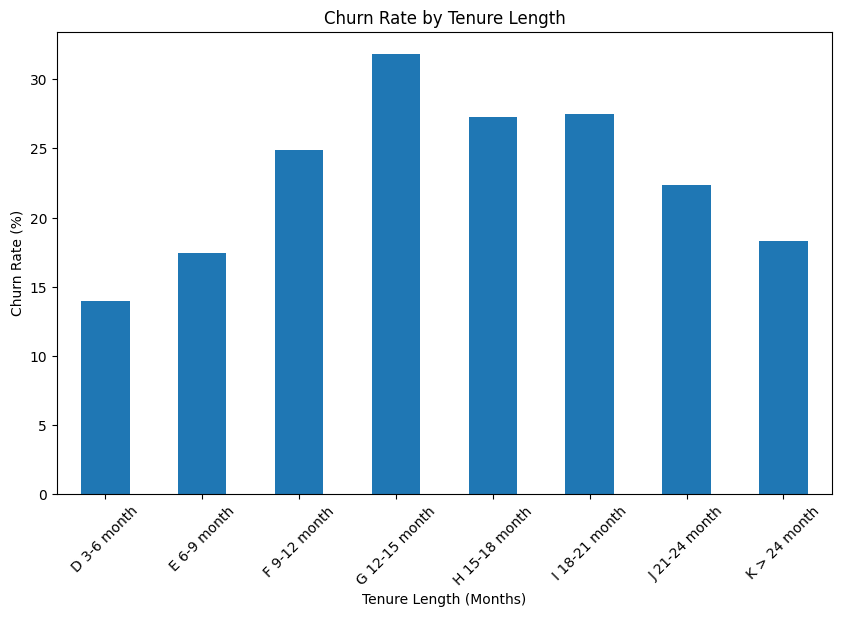

In [43]:
# Calculate the churn rate for each tenure length
churn_rates = train_copy.groupby('Tenure')['Churn'].mean() * 100
print(churn_rates)
# Plot the churn rates
churn_rates.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Tenure Length (Months)')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tenure Length')
plt.xticks(rotation=45)
plt.show()

**Interpretation**

- D 3-6 month: The churn rate for customers with a tenure of 3-6 months is 13.95% _meaning that around 13.95% of customers in this tenure range have churned.

- E 6-9 month: The churn rate for customers with a tenure of 6-9 months is 17.44%_meaning that around 17.44% of customers in this tenure range have churned.

- F 9-12 month: The churn rate for customers with a tenure of 9-12 months is 24.87%_meaning that around 24.87% of customers in this tenure range have churned.

- G 12-15 month: The churn rate for customers with a tenure of 12-15 months is 31.85%_meaning that around 31.85% of customers in this tenure range have churned.

- H 15-18 month: The churn rate for customers with a tenure of 15-18 months is 27.29%_meaning that around 27.29% of customers in this tenure range have churned.

- I 18-21 month: The churn rate for customers with a tenure of 18-21 months is 27.50%_meaning that around 27.50% of customers in this tenure range have churned.

- J 21-24 month: The churn rate for customers with a tenure of 21-24 months is 22.36%_meaning that around 22.36% of customers in this tenure range have churned.

- K > 24 month: The churn rate for customers with a tenure greater than 24 months is 18.31%. _meaning that around 18.31% of customers in this tenure range have churned.

#### 5. Which Region has most clients churning?

Region
DAKAR          28.663701
DIOURBEL        2.738053
FATICK          1.367089
KAFFRINE        0.697875
KAOLACK         2.482577
KEDOUGOU        4.085603
KOLDA           1.109741
LOUGA           1.608325
MATAM           2.061433
SAINT-LOUIS     1.215460
SEDHIOU         5.408886
TAMBACOUNDA     1.585516
THIES           1.662397
ZIGUINCHOR      2.745560
Name: Churn, dtype: float64


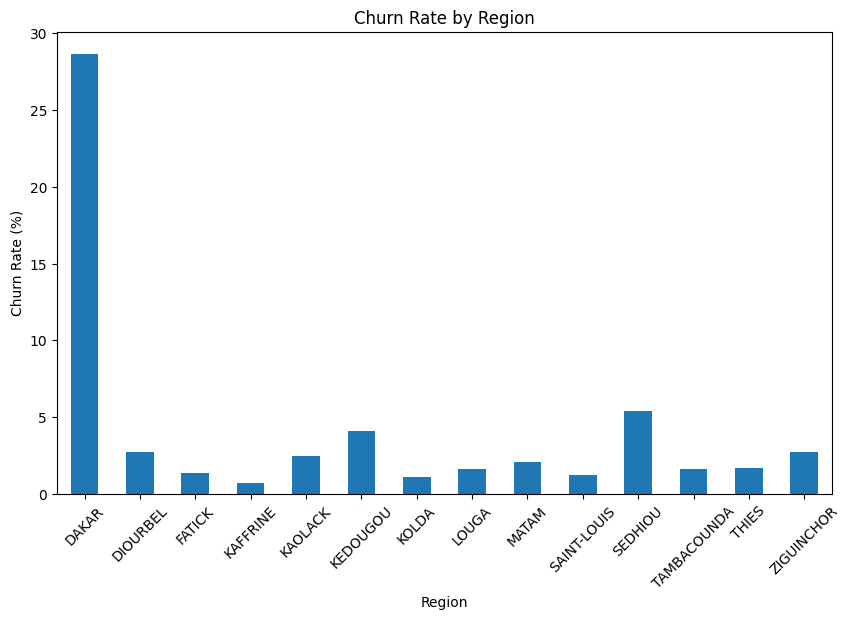

In [44]:
# Calculate the churn rate for each tenure length
churn_rates = train_copy.groupby('Region')['Churn'].mean() * 100
print(churn_rates)
# Plot the churn rates
churn_rates.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Region')
plt.xticks(rotation=45)
plt.show()

> - Dakar which is the Region with highest customers is also the region with greatest churn rate of 28.6%

#### 6. Do client churn or not churn if active for 90 days (Regularity)?

Regularity
1     70.772865
2     57.278781
3     47.118463
4     40.731871
5     35.085377
        ...    
58     0.659366
59     0.609326
60     0.551300
61     0.402773
62     0.365165
Name: Churn, Length: 62, dtype: float64


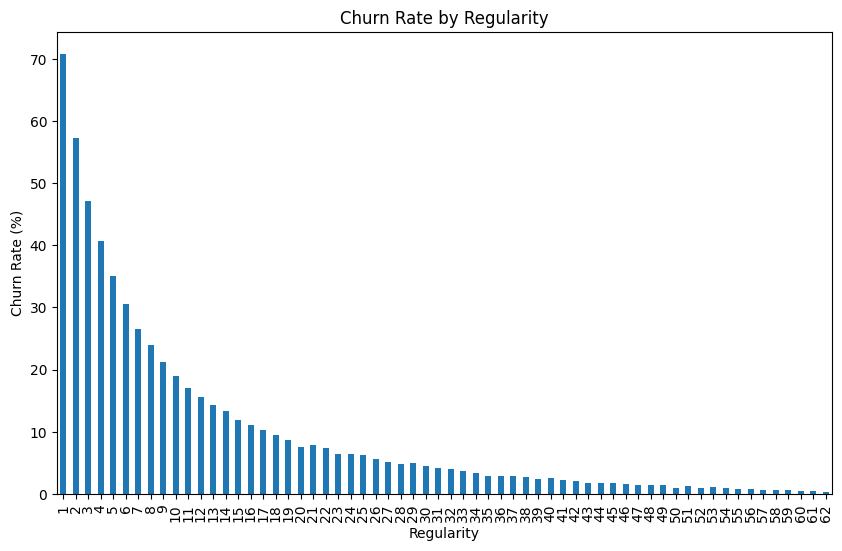

In [45]:
# Calculate the churn rate for each tenure length
churn_rates = train_copy.groupby('Regularity')['Churn'].mean() * 100
print(churn_rates)
# Plot the churn rates
churn_rates.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Regularity')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Regularity')
#plt.xticks(rotation=45)
plt.show()

> - Regularity represents number of times the client is active for 90 days. From the bar chart, it can be seen that customers who have been active once had the highest churn rate of 70.77%.
> - It can be seen that as the Regularity increases, customers churn rate decreases.

#### 7. What's the correlation between the various features?

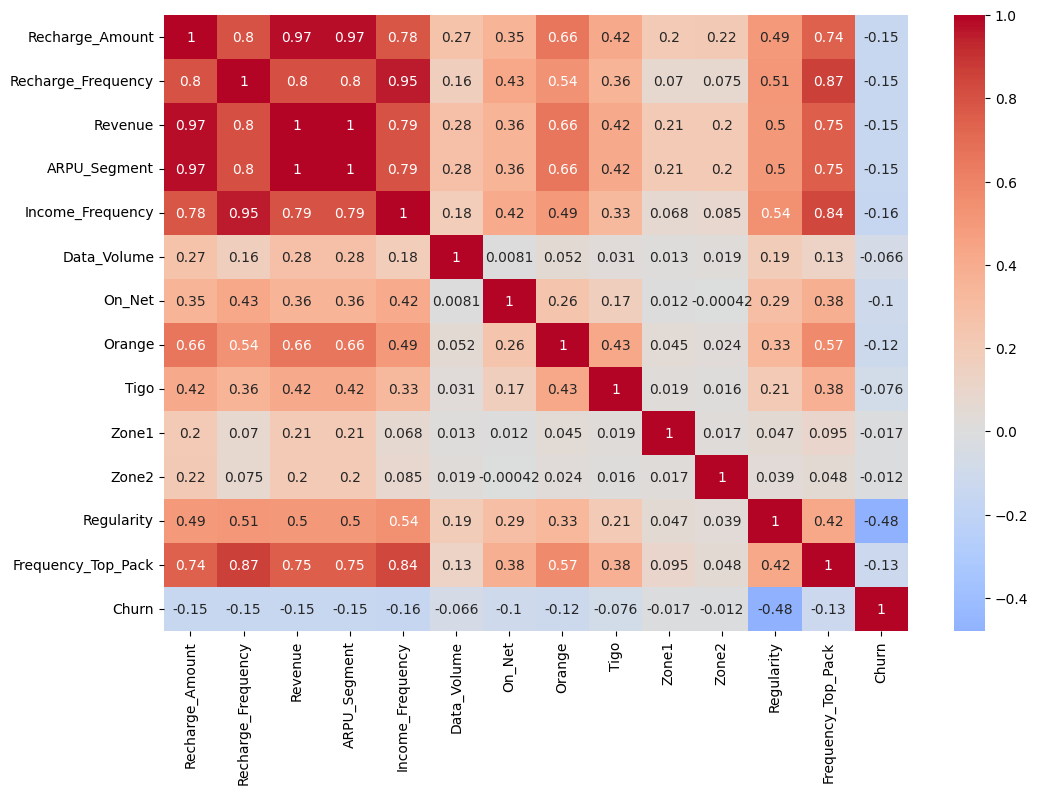

In [46]:
#visualize correlation between columns using a heatmap
sns.heatmap(data=train_copy.corr(),  annot=True, cmap="coolwarm", center=0, ax=plt.subplots(figsize=(12,8))[1]);

### **Summary Analysis**
A correlation coefficient close to 1 indicates a strong positive relationship, meaning that as one variable increases, the other variable also tends to increase. Conversely, a correlation coefficient close to -1 indicates a strong negative relationship, where as one variable increases, the other variable tends to decrease. A correlation coefficient close to 0 suggests a weak or no linear relationship between the variables.

An example is that the correlation coefficient between "Recharge_Amount" and "Churn" is -0.15, which suggests a weak negative relationship. This means that higher amounts spent by customers are slightly associated with a lower likelihood of churn

In [47]:
churn_corr_df = train_copy.corr()[['Churn']].sort_values(by='Churn', ascending=False)
churn_corr_df

,Churn
Churn,1.000000
Zone2,-0.012181
Zone1,-0.017008
Data_Volume,-0.065591
Tigo,-0.076414
On_Net,-0.103894
Orange,-0.116038
Frequency_Top_Pack,-0.129951
Recharge_Amount,-0.145081
Revenue,-0.148176


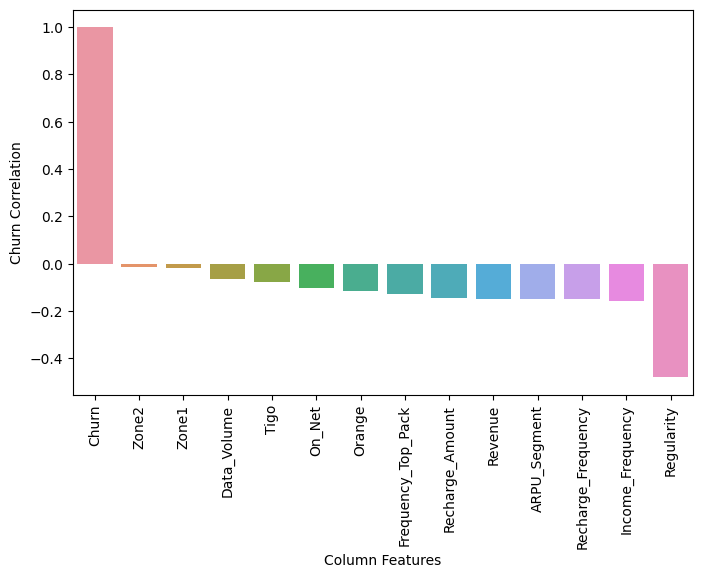

In [48]:
#check correlation between features and churn
plt.figure(figsize=(8,5))
# create a barplot for the churn-correlation
sns.barplot(data=churn_corr_df, x=churn_corr_df.index, y='Churn')
plt.ylabel('Churn Correlation')
plt.xlabel('Column Features')
plt.xticks(rotation=90)
plt.show();

> - Zone2, Zone1, Data_Volume, Tigo, On_Net, Orange, and Frequency_Top_Pack were the features that had least correlation with the Churn.
> - Regularity, Income_frequency, Recharge_frequency, APRU_Segement, Revenue and Recharge_Amount had a stronger negative correlation with the Churn.
> - There was no positive correlation.

### Testing the hypothesis

## Hypothesis

**Null hypothesis(H0)**: There is no significant relationship between the customers' characteristics and the churn rate. In other words, the variables in the dataset have no impact on customer churn.

**Alternative hypothesisH1)**: There is a significant relationship between the customers' characteristics and the churn rate. The variables in the dataset have an impact on customer churn.

In [49]:
#testing hypothesis on categorical columns
categorical_columns=['Region', 'Tenure','MRG', 'Top_Pack' ]

#significance level
alpha = 0.05

for column in categorical_columns:
    contingency_table = pd.crosstab(train_copy[column], train_copy['Churn'])

    # Performing chi-square test
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    print(p_value)

    # Testing the hypothesis

    if p_value < alpha:


        print(f"{column}: There is a significant relationship with churn (reject null hypothesis)")
    else:
        print(f"{column}: There is no significant relationship with churn (fail to reject null hypothesis)")


0.0
Region: There is a significant relationship with churn (reject null hypothesis)
0.0
Tenure: There is a significant relationship with churn (reject null hypothesis)
1.0
MRG: There is no significant relationship with churn (fail to reject null hypothesis)
0.0
Top_Pack: There is a significant relationship with churn (reject null hypothesis)


In [50]:
#testing hypothesis on numerical columns
numerical_columns=['Recharge_Amount', 'Recharge_Frequency', 'Revenue', 'ARPU_Segment',
                  'Income_Frequency', 'Data_Volume', 'On_Net', 'Orange', 'Tigo', 'Zone1',
                   'Zone2', 'Regularity', 'Frequency_Top_Pack']


# Create an empty dictionary to store the p-values of the hypothesis test
p_values = {}

# Set the significance level (alpha) for the hypothesis test
alpha = 0.05

# Iterate over each numerical column and perform the hypothesis test
for column in numerical_columns:
    correlation, p_value = pearsonr(train_copy[column], train_copy['Churn'])
    p_values[column] = p_value
    print(p_value)

# Print the p-values and determine whether to reject or fail to reject the null hypothesis
for column, p_value in p_values.items():
    if p_value < alpha:
        print(f"{column}: There is a significant relationship with churn (reject null hypothesis)")
    else:
        print(f"{column}: There is no significant relationship with churn (fail to reject null hypothesis)")


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
9.871543145369861e-70
1.2344278720108533e-36
0.0
0.0
Recharge_Amount: There is a significant relationship with churn (reject null hypothesis)
Recharge_Frequency: There is a significant relationship with churn (reject null hypothesis)
Revenue: There is a significant relationship with churn (reject null hypothesis)
ARPU_Segment: There is a significant relationship with churn (reject null hypothesis)
Income_Frequency: There is a significant relationship with churn (reject null hypothesis)
Data_Volume: There is a significant relationship with churn (reject null hypothesis)
On_Net: There is a significant relationship with churn (reject null hypothesis)
Orange: There is a significant relationship with churn (reject null hypothesis)
Tigo: There is a significant relationship with churn (reject null hypothesis)
Zone1: There is a significant relationship with churn (reject null hypothesis)
Zone2: There is a significant relationship with churn (reject null hypo

> - It can be concluded from the hypothesis testing that there is a significant relationship between all the customer's charaterictics and the Churn which is the target feature except the MRG (a client who is going) column.

**From the EDA performed we realized that the data is imbalanced since the number of customers who aren't churning made up the majority of the dataset.**

In dealing with this issue:

1. All other evaluation metrics will be used except 'accuracy' since it will be in favour of the majority class
2. The type of machine learning algorithms that will be used are the Tree based models and other regression models.

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

In [51]:
# Reduce the number of categories in the Top_Pack column for train data
train_data['TOP_PACK'].nunique()

126

In [52]:
Top_Pack_Counts = train_data['TOP_PACK'].value_counts()

In [53]:
rare_categories = Top_Pack_Counts[Top_Pack_Counts < 10].index

In [54]:
train_data.loc[train_data['TOP_PACK'].isin(rare_categories), 'TOP_PACK'] = 'Rare'


In [55]:
train_data['TOP_PACK'].nunique()

90

In [56]:
# top_pack=train_data['TOP_PACK'].unique().tolist()
# top_pack

In [57]:
# Reduce the number of categories in the Top_Pack column for test data
test_data['Top_Pack'].nunique()

98

In [58]:
Top_Pack_Counts = test_data['Top_Pack'].value_counts()

In [59]:
rare_categories = Top_Pack_Counts[Top_Pack_Counts < 10].index

In [60]:
test_data.loc[test_data['Top_Pack'].isin(rare_categories), 'Top_Pack'] = 'Rare'

In [61]:
test_data['Top_Pack'].nunique()

72

## Drop Duplicates

In [62]:
#check duplicates
train_data.duplicated().sum()

0

> - **Note**: Data will be splitted into train and evaluation before missing values are imputed to prevent data leakage.

In [63]:
#drop User ID column
train_data=train_data.drop(columns=['user_id'])
train_data.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


In [64]:
train = train_data

test = test_data

In [65]:
#check shape
train.shape, test.shape

((1077024, 18), (190063, 18))

## Impute Missing Values

In [66]:
# check missing values in train set
train.isnull().sum()

REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

In [67]:
#check percentage of missing values
missing_values_percentage = (train.isnull().sum() / len(train)) * 100
missing_values_percentage

REGION            39.399029
TENURE             0.000000
MONTANT           35.086033
FREQUENCE_RECH    35.086033
REVENUE           33.644097
ARPU_SEGMENT      33.644097
FREQUENCE         33.644097
DATA_VOLUME       49.187669
ON_NET            36.505593
ORANGE            41.516624
TIGO              59.866261
ZONE1             92.117353
ZONE2             93.612584
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          41.864898
FREQ_TOP_PACK     41.864898
CHURN              0.000000
dtype: float64

> - Zone1 and Zone2 have missing values with percentages of 92.1 and 93.6 respectively. Since it's above 90%, they will be dropped.

In [68]:
#drop zone1 and zone2
train=train.drop(columns=['ZONE1', 'ZONE2'])
train.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NO,56,All-net 500F=2000F;5d,11.0,0


In [69]:
#check missing values in test(eval) set
test.isnull().sum()

User ID               0
Region                0
Tenure                0
Recharge_Amount       0
Recharge_Frequency    0
Revenue               0
ARPU_Segment          0
Income_Frequency      0
Data_Volume           0
On_Net                0
Orange                0
Tigo                  0
Zone1                 0
Zone2                 0
MRG                   0
Regularity            0
Top_Pack              0
Frequency_Top_Pack    0
dtype: int64

In [70]:
#check percentage of missing values
missing_values_percentage = (test.isnull().sum() / len(test)) * 100
missing_values_percentage

User ID               0.0
Region                0.0
Tenure                0.0
Recharge_Amount       0.0
Recharge_Frequency    0.0
Revenue               0.0
ARPU_Segment          0.0
Income_Frequency      0.0
Data_Volume           0.0
On_Net                0.0
Orange                0.0
Tigo                  0.0
Zone1                 0.0
Zone2                 0.0
MRG                   0.0
Regularity            0.0
Top_Pack              0.0
Frequency_Top_Pack    0.0
dtype: float64

> - Zone1 and Zone2 have missing values with percentages of 92.2 and 93.7 respectively. Since it's above 90%, they will be dropped.

In [71]:
#drop zone1 and zone2
test=test.drop(columns=['Zone1', 'Zone2'])
test.head()

,User ID,Region,Tenure,Recharge_Amount,Recharge_Frequency,Revenue,ARPU_Segment,Income_Frequency,Data_Volume,On_Net,Orange,Tigo,MRG,Regularity,Top_Pack,Frequency_Top_Pack
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,6.0,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,265.0,27.0,28.0,6.0,NO,2,All-net 500F=2000F;5d,5.0
2,5a4db591c953a8d8f373877fad37aaf4268899a1,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,0.0,27.0,28.0,6.0,NO,22,All-net 500F=2000F;5d,5.0
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,265.0,27.0,28.0,6.0,NO,6,All-net 500F=2000F;5d,5.0
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,NO,60,"Data:1000F=2GB,30d",4.0


> - **Note**: MRG (a client is going) column has just one value ('NO'). During the hypothesis testing, it was the only column that had no significant relationship with the Churn. It will be dropped too.

In [72]:
#drop MRG column in both train and test set.
train=train.drop(columns=['MRG'])
train.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,62,On net 200F=Unlimited _call24H,30.0,0
1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,0
2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0
3,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,61,"Data:490F=1GB,7d",7.0,0
4,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,56,All-net 500F=2000F;5d,11.0,0


In [73]:
test=test.drop(columns=['MRG'])
test.head()

,User ID,Region,Tenure,Recharge_Amount,Recharge_Frequency,Revenue,ARPU_Segment,Income_Frequency,Data_Volume,On_Net,Orange,Tigo,Regularity,Top_Pack,Frequency_Top_Pack
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,6.0,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,265.0,27.0,28.0,6.0,2,All-net 500F=2000F;5d,5.0
2,5a4db591c953a8d8f373877fad37aaf4268899a1,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,0.0,27.0,28.0,6.0,22,All-net 500F=2000F;5d,5.0
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,265.0,27.0,28.0,6.0,6,All-net 500F=2000F;5d,5.0
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,60,"Data:1000F=2GB,30d",4.0


In [74]:
#renaming columns for train set
train.rename(columns={

    'REGION': 'Region',
    'TENURE': 'Tenure',
    'MONTANT': 'Recharge_Amount',
    'FREQUENCE_RECH': 'Recharge_Frequency',
    'REVENUE': 'Revenue',
    'ARPU_SEGMENT': 'ARPU_Segment',
    'FREQUENCE': 'Income_Frequency',
    'DATA_VOLUME': 'Data_Volume',
    'ON_NET': 'On_Net',
    'ORANGE': 'Orange',
    'TIGO': 'Tigo',

    'REGULARITY': 'Regularity',
    'TOP_PACK': 'Top_Pack',
    'FREQ_TOP_PACK': 'Freq_Top_Pack',
    'CHURN': 'Churn'
}, inplace=True)
train.head()

,Region,Tenure,Recharge_Amount,Recharge_Frequency,Revenue,ARPU_Segment,Income_Frequency,Data_Volume,On_Net,Orange,Tigo,Regularity,Top_Pack,Freq_Top_Pack,Churn
0,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,62,On net 200F=Unlimited _call24H,30.0,0
1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,0
2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0
3,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,61,"Data:490F=1GB,7d",7.0,0
4,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,56,All-net 500F=2000F;5d,11.0,0


In [75]:
#renaming columns for test set
test.rename(columns={

    'REGION': 'Region',
    'TENURE': 'Tenure',
    'MONTANT': 'Recharge_Amount',
    'FREQUENCE_RECH': 'Recharge_Frequency',
    'REVENUE': 'Revenue',
    'ARPU_SEGMENT': 'ARPU_Segment',
    'FREQUENCE': 'Income_Frequency',
    'DATA_VOLUME': 'Data_Volume',
    'ON_NET': 'On_Net',
    'ORANGE': 'Orange',
    'TIGO': 'Tigo',

    'REGULARITY': 'Regularity',
    'TOP_PACK': 'Top_Pack',
    'FREQ_TOP_PACK': 'Freq_Top_Pack',
    'CHURN': 'Churn'
}, inplace=True)
test.head()

,User ID,Region,Tenure,Recharge_Amount,Recharge_Frequency,Revenue,ARPU_Segment,Income_Frequency,Data_Volume,On_Net,Orange,Tigo,Regularity,Top_Pack,Frequency_Top_Pack
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,6.0,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,265.0,27.0,28.0,6.0,2,All-net 500F=2000F;5d,5.0
2,5a4db591c953a8d8f373877fad37aaf4268899a1,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,0.0,27.0,28.0,6.0,22,All-net 500F=2000F;5d,5.0
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,265.0,27.0,28.0,6.0,6,All-net 500F=2000F;5d,5.0
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,60,"Data:1000F=2GB,30d",4.0


In [76]:
#filling the numerical null values in train set with the median
num_features=['Recharge_Amount', 'Recharge_Frequency', 'Revenue', 'ARPU_Segment', 'Income_Frequency',
            'Data_Volume', 'On_Net', 'Orange', 'Tigo', 'Regularity', 'Freq_Top_Pack']

for feature in num_features:
    median_value =train[feature].median()
    train[feature].fillna(median_value, inplace=True)

In [77]:
train.head()

,Region,Tenure,Recharge_Amount,Recharge_Frequency,Revenue,ARPU_Segment,Income_Frequency,Data_Volume,On_Net,Orange,Tigo,Regularity,Top_Pack,Freq_Top_Pack,Churn
0,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,62,On net 200F=Unlimited _call24H,30.0,0
1,NaN,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,258.0,27.0,29.0,6.0,3,NaN,5.0,0
2,NaN,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,258.0,27.0,29.0,6.0,1,NaN,5.0,0
3,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,61,"Data:490F=1GB,7d",7.0,0
4,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,56,All-net 500F=2000F;5d,11.0,0


In [78]:
#filling the numerical null values in test set with the median
num_features=['Recharge_Amount', 'Recharge_Frequency', 'Revenue', 'ARPU_Segment', 'Income_Frequency',
            'Data_Volume', 'On_Net', 'Orange', 'Tigo', 'Regularity', 'Frequency_Top_Pack']

for feature in num_features:
    median_value =test[feature].median()
    test[feature].fillna(median_value, inplace=True)

In [79]:
test.head()

,User ID,Region,Tenure,Recharge_Amount,Recharge_Frequency,Revenue,ARPU_Segment,Income_Frequency,Data_Volume,On_Net,Orange,Tigo,Regularity,Top_Pack,Frequency_Top_Pack
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,6.0,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,265.0,27.0,28.0,6.0,2,All-net 500F=2000F;5d,5.0
2,5a4db591c953a8d8f373877fad37aaf4268899a1,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,0.0,27.0,28.0,6.0,22,All-net 500F=2000F;5d,5.0
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,265.0,27.0,28.0,6.0,6,All-net 500F=2000F;5d,5.0
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,60,"Data:1000F=2GB,30d",4.0


In [80]:
#fill cat values with mode
mode_top_pack = train['Top_Pack'].mode()[0]
mode_region = train['Region'].mode()[0]
mode_churn=train['Churn'].mode()[0]

In [81]:
#filling the null values with the mode
train['Top_Pack'].fillna(mode_top_pack, inplace=True)
train['Region'].fillna(mode_region, inplace=True)
train['Churn'].fillna(mode_churn, inplace=True)

In [82]:
#fill cat values with mode
mode_top_pack = test['Top_Pack'].mode()[0]
mode_region = test['Region'].mode()[0]

In [83]:
#filling the null values with the mode
test['Top_Pack'].fillna(mode_top_pack, inplace=True)
test['Region'].fillna(mode_region, inplace=True)


## Feature Selection

In [84]:
#get numerical columns in train set
num_feature=train.drop(columns=['Region', 'Tenure', 'Top_Pack', 'Churn'])
num_feature.head()

,Recharge_Amount,Recharge_Frequency,Revenue,ARPU_Segment,Income_Frequency,Data_Volume,On_Net,Orange,Tigo,Regularity,Freq_Top_Pack
0,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,62,30.0
1,3000.0,7.0,3000.0,1000.0,9.0,258.0,27.0,29.0,6.0,3,5.0
2,3000.0,7.0,3000.0,1000.0,9.0,258.0,27.0,29.0,6.0,1,5.0
3,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,61,7.0
4,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,56,11.0


In [85]:
#get numerical columns in test set
test_num_feature=test.drop(columns=['User ID','Region', 'Tenure', 'Top_Pack'])
test_num_feature.head()

,Recharge_Amount,Recharge_Frequency,Revenue,ARPU_Segment,Income_Frequency,Data_Volume,On_Net,Orange,Tigo,Regularity,Frequency_Top_Pack
0,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,6.0,35,5.0
1,3000.0,7.0,3000.0,1000.0,9.0,265.0,27.0,28.0,6.0,2,5.0
2,3000.0,7.0,3000.0,1000.0,9.0,0.0,27.0,28.0,6.0,22,5.0
3,3000.0,7.0,3000.0,1000.0,9.0,265.0,27.0,28.0,6.0,6,5.0
4,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,60,4.0


In [86]:
#selecting important features to train the model using VIF since there were high correlation between features
def cal_vif(num_feature):
    thresh =5
    output =pd.DataFrame
    k=num_feature.shape[1]
    vif=[variance_inflation_factor(num_feature.values, i) for i in range (num_feature.shape[1])]
    for i in range (1,k):
        print ('iteration no' , i)
        print(vif)
        a=np.argmax(vif)
        print('Max vif is for variable no:', a)
        if(vif[a]<=thresh):
            break
        if(i==1):
            output=num_feature.drop(num_feature.columns[a],axis=1)
            vif=[variance_inflation_factor(output.values, j) for j in range (output.shape[1])]
        elif(i>1):
            output=output.drop(output.columns[a],axis=1)
            vif=[variance_inflation_factor(output.values, j) for j in range (output.shape[1])]
    return(output)

selected_features=cal_vif(num_feature)
selected_features.head()




iteration no 1
[31.568102602589292, 24.75507731918274, 126230012.99790002, 126229844.9401632, 23.04369079072325, 1.192908582465091, 1.30505192626856, 2.4024532217081416, 1.421200942594219, 2.7933535478386795, 7.133129499571177]
Max vif is for variable no: 2
iteration no 2
[31.56788550597492, 24.75506523228817, 33.19972625373271, 23.043132496561256, 1.1929083749466092, 1.3050508674080656, 2.40244623734459, 1.4212005332475144, 2.7927322911114443, 7.13311735323419]
Max vif is for variable no: 2
iteration no 3
[6.504759964722234, 24.68408178196384, 22.66608606962645, 1.1766593869012119, 1.304420922169352, 2.3562520216201626, 1.420064599854865, 2.792667919555487, 7.10481000251644]
Max vif is for variable no: 1
iteration no 4
[6.309617056923928, 9.429564390406247, 1.1746897384512558, 1.2932195924149754, 2.3544311041047425, 1.418773908798593, 2.7843914905916285, 6.30517648800794]
Max vif is for variable no: 1
iteration no 5
[5.215788924086989, 1.172705360991432, 1.2798891760094024, 2.25903350

,Data_Volume,On_Net,Orange,Tigo,Regularity,Freq_Top_Pack
0,8835.0,3391.0,396.0,185.0,62,30.0
1,258.0,27.0,29.0,6.0,3,5.0
2,258.0,27.0,29.0,6.0,1,5.0
3,9385.0,27.0,46.0,20.0,61,7.0
4,9360.0,66.0,102.0,34.0,56,11.0


In [87]:
#get categorical columns
cat_feature=train.drop(columns= ['Recharge_Amount', 'Recharge_Frequency', 'Revenue', 'ARPU_Segment', 'Income_Frequency',
            'Data_Volume', 'On_Net', 'Orange', 'Tigo',  'Regularity', 'Freq_Top_Pack'] )
cat_feature.head()

,Region,Tenure,Top_Pack,Churn
0,DAKAR,K > 24 month,On net 200F=Unlimited _call24H,0
1,DAKAR,K > 24 month,All-net 500F=2000F;5d,0
2,DAKAR,K > 24 month,All-net 500F=2000F;5d,0
3,SAINT-LOUIS,K > 24 month,"Data:490F=1GB,7d",0
4,DAKAR,K > 24 month,All-net 500F=2000F;5d,0


In [88]:
# add categorical features to the selected features
train_set=pd.concat([selected_features, cat_feature], axis=1)
train_set

,Data_Volume,On_Net,Orange,Tigo,Regularity,Freq_Top_Pack,Region,Tenure,Top_Pack,Churn
0,8835.0,3391.0,396.0,185.0,62,30.0,DAKAR,K > 24 month,On net 200F=Unlimited _call24H,0
1,258.0,27.0,29.0,6.0,3,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d,0
2,258.0,27.0,29.0,6.0,1,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d,0
3,9385.0,27.0,46.0,20.0,61,7.0,SAINT-LOUIS,K > 24 month,"Data:490F=1GB,7d",0
4,9360.0,66.0,102.0,34.0,56,11.0,DAKAR,K > 24 month,All-net 500F=2000F;5d,0
...,...,...,...,...,...,...,...,...,...,...
1077019,258.0,27.0,29.0,6.0,16,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d,0
1077020,0.0,15.0,77.0,6.0,34,2.0,TAMBACOUNDA,K > 24 month,All-net 500F=2000F;5d,0
1077021,258.0,27.0,29.0,6.0,3,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d,1
1077022,591.0,11.0,37.0,5.0,16,1.0,DAKAR,K > 24 month,All-net 600F= 3000F ;5d,0


In [89]:
#selecting important features to test the model using VIF since there were high correlation between features
def cal_vif(test_num_feature):
    thresh =5
    output =pd.DataFrame
    k=test_num_feature.shape[1]
    vif=[variance_inflation_factor(test_num_feature.values, i) for i in range (test_num_feature.shape[1])]
    for i in range (1,k):
        print ('iteration no' , i)
        print(vif)
        a=np.argmax(vif)
        print('Max vif is for variable no:', a)
        if(vif[a]<=thresh):
            break
        if(i==1):
            output=test_num_feature.drop(test_num_feature.columns[a],axis=1)
            vif=[variance_inflation_factor(output.values, j) for j in range (output.shape[1])]
        elif(i>1):
            output=output.drop(output.columns[a],axis=1)
            vif=[variance_inflation_factor(output.values, j) for j in range (output.shape[1])]
    return(output)

features_selected=cal_vif(test_num_feature)
features_selected.head()

iteration no 1
[34.25745978234539, 24.924983345167774, 124605268.65877302, 124605551.36011818, 23.003906030185192, 1.2246770966772336, 1.3063529669836829, 2.4431259639231633, 1.4072638508446793, 2.7978003240540543, 7.43258903507543]
Max vif is for variable no: 3
iteration no 2
[34.25744933319485, 24.92495795754213, 36.161842509039126, 23.00379074939866, 1.224676934149438, 1.3063527425634698, 2.4431240926391613, 1.4072509359650152, 2.797228336743997, 7.432587704439116]
Max vif is for variable no: 2
iteration no 3
[6.534703966625771, 24.80293096223233, 22.54205863272036, 1.2085195867921745, 1.3057992183041032, 2.3914680526753456, 1.4071042702651402, 2.797154664932658, 7.399006729923944]
Max vif is for variable no: 1
iteration no 4
[6.355222395749585, 9.51423961218906, 1.2059257378057502, 1.2959997935683893, 2.3898553229522532, 1.4061647663446597, 2.7907670865600758, 6.485990156568173]
Max vif is for variable no: 1
iteration no 5
[5.3131321995861684, 1.2032541124904417, 1.2814356025933318

,Data_Volume,On_Net,Orange,Tigo,Regularity,Frequency_Top_Pack
0,0.0,64.0,70.0,6.0,35,5.0
1,265.0,27.0,28.0,6.0,2,5.0
2,0.0,27.0,28.0,6.0,22,5.0
3,265.0,27.0,28.0,6.0,6,5.0
4,7783.0,30.0,24.0,0.0,60,4.0


In [90]:
#get categorical columns
cat_features=test.drop(columns= ['User ID','Recharge_Amount', 'Recharge_Frequency', 'Revenue', 'ARPU_Segment', 'Income_Frequency',
            'Data_Volume', 'On_Net', 'Orange', 'Tigo',  'Regularity', 'Frequency_Top_Pack'] )
cat_features.head()

,Region,Tenure,Top_Pack
0,MATAM,I 18-21 month,All-net 500F=2000F;5d
1,DAKAR,K > 24 month,All-net 500F=2000F;5d
2,DAKAR,K > 24 month,All-net 500F=2000F;5d
3,DAKAR,K > 24 month,All-net 500F=2000F;5d
4,SAINT-LOUIS,K > 24 month,"Data:1000F=2GB,30d"


In [91]:
# add categorical features to the selected features
test_set=pd.concat([features_selected, cat_features], axis=1)
test_set

,Data_Volume,On_Net,Orange,Tigo,Regularity,Frequency_Top_Pack,Region,Tenure,Top_Pack
0,0.0,64.0,70.0,6.0,35,5.0,MATAM,I 18-21 month,All-net 500F=2000F;5d
1,265.0,27.0,28.0,6.0,2,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d
2,0.0,27.0,28.0,6.0,22,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d
3,265.0,27.0,28.0,6.0,6,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d
4,7783.0,30.0,24.0,0.0,60,4.0,SAINT-LOUIS,K > 24 month,"Data:1000F=2GB,30d"
...,...,...,...,...,...,...,...,...,...
190058,0.0,26.0,28.0,6.0,14,1.0,DAKAR,F 9-12 month,All-net 500F=2000F;5d
190059,0.0,8.0,54.0,6.0,29,3.0,DAKAR,K > 24 month,All-net 500F =2000F_AllNet_Unlimited
190060,265.0,27.0,28.0,6.0,2,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d
190061,0.0,1.0,2.0,6.0,12,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d


In [92]:
test_set = test_set.rename(columns={'Frequency_Top_Pack': 'Freq_Top_Pack'})

In [93]:
test_set

,Data_Volume,On_Net,Orange,Tigo,Regularity,Freq_Top_Pack,Region,Tenure,Top_Pack
0,0.0,64.0,70.0,6.0,35,5.0,MATAM,I 18-21 month,All-net 500F=2000F;5d
1,265.0,27.0,28.0,6.0,2,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d
2,0.0,27.0,28.0,6.0,22,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d
3,265.0,27.0,28.0,6.0,6,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d
4,7783.0,30.0,24.0,0.0,60,4.0,SAINT-LOUIS,K > 24 month,"Data:1000F=2GB,30d"
...,...,...,...,...,...,...,...,...,...
190058,0.0,26.0,28.0,6.0,14,1.0,DAKAR,F 9-12 month,All-net 500F=2000F;5d
190059,0.0,8.0,54.0,6.0,29,3.0,DAKAR,K > 24 month,All-net 500F =2000F_AllNet_Unlimited
190060,265.0,27.0,28.0,6.0,2,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d
190061,0.0,1.0,2.0,6.0,12,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d


## Dataset Splitting

In [94]:
train_set

,Data_Volume,On_Net,Orange,Tigo,Regularity,Freq_Top_Pack,Region,Tenure,Top_Pack,Churn
0,8835.0,3391.0,396.0,185.0,62,30.0,DAKAR,K > 24 month,On net 200F=Unlimited _call24H,0
1,258.0,27.0,29.0,6.0,3,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d,0
2,258.0,27.0,29.0,6.0,1,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d,0
3,9385.0,27.0,46.0,20.0,61,7.0,SAINT-LOUIS,K > 24 month,"Data:490F=1GB,7d",0
4,9360.0,66.0,102.0,34.0,56,11.0,DAKAR,K > 24 month,All-net 500F=2000F;5d,0
...,...,...,...,...,...,...,...,...,...,...
1077019,258.0,27.0,29.0,6.0,16,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d,0
1077020,0.0,15.0,77.0,6.0,34,2.0,TAMBACOUNDA,K > 24 month,All-net 500F=2000F;5d,0
1077021,258.0,27.0,29.0,6.0,3,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d,1
1077022,591.0,11.0,37.0,5.0,16,1.0,DAKAR,K > 24 month,All-net 600F= 3000F ;5d,0


In [95]:
top_pack=train_set['Top_Pack'].unique().tolist()
top_pack

['On net 200F=Unlimited _call24H',
 'All-net 500F=2000F;5d',
 'Data:490F=1GB,7d',
 'On-net 500=4000,10d',
 'Data:3000F=10GB,30d',
 'Data:200F=Unlimited,24H',
 'IVR Echat_Daily_50F',
 'Data:1000F=2GB,30d',
 'Mixt 250F=Unlimited_call24H',
 'On-net 1000F=10MilF;10d',
 'MIXT:500F= 2500F on net _2500F off net;2d',
 'Data: 200 F=100MB,24H',
 'All-net 600F= 3000F ;5d',
 'On-net 200F=60mn;1d',
 'Twter_U2opia_Daily',
 'Data: 100 F=40MB,24H',
 'All-net 500F =2000F_AllNet_Unlimited',
 'On net 200F= 3000F_10Mo ;24H',
 '200=Unlimited1Day',
 'Jokko_Daily',
 'Data:1000F=5GB,7d',
 'Data:700F=1.5GB,7d',
 'All-net 1000=5000;5d',
 'Data:150F=SPPackage1,24H',
 'Rare',
 'VAS(IVR_Radio_Daily)',
 'MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t',
 'MIXT: 200mnoff net _unl on net _5Go;30d',
 'On-net 500F_FNF;3d',
 'MIXT: 590F=02H_On-net_200SMS_200 Mo;24h\t\t',
 'Data:1500F=3GB,30D',
 'Data:300F=100MB,2d',
 'Data:500F=2GB,24H',
 'Data: 490F=Night,00H-08H',
 'All-net 1000F=(3000F On+3000F Off);5d',
 'New_YAKALMA_4_ALL'

In [96]:
X= train_set.drop(columns = ['Churn'])
y= train_set['Churn']

In [97]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y,test_size=0.2, random_state=42)

## Create Pipeline to Impute Missing Values, Encode columns and Scale Columns

In [98]:
#check X_train
X_train.head()

,Data_Volume,On_Net,Orange,Tigo,Regularity,Freq_Top_Pack,Region,Tenure,Top_Pack
32640,0.0,1019.0,759.0,6.0,62,52.0,KOLDA,K > 24 month,All-net 500F=2000F;5d
652405,11980.0,1.0,0.0,1.0,46,9.0,DIOURBEL,K > 24 month,"Data:490F=1GB,7d"
1043519,258.0,0.0,29.0,6.0,25,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d
169718,0.0,44.0,171.0,61.0,43,20.0,DIOURBEL,K > 24 month,All-net 500F=2000F;5d
621002,0.0,23.0,282.0,73.0,62,24.0,DAKAR,K > 24 month,All-net 500F =2000F_AllNet_Unlimited


In [99]:
#check X_eval
X_eval.head()

,Data_Volume,On_Net,Orange,Tigo,Regularity,Freq_Top_Pack,Region,Tenure,Top_Pack
861251,258.0,27.0,29.0,6.0,5,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d
737333,16419.0,183.0,177.0,53.0,58,13.0,THIES,K > 24 month,All-net 500F =2000F_AllNet_Unlimited
1025185,258.0,27.0,29.0,6.0,2,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d
337184,258.0,27.0,29.0,6.0,3,5.0,DAKAR,K > 24 month,All-net 500F=2000F;5d
802458,3.0,26.0,48.0,5.0,50,2.0,THIES,K > 24 month,MIXT:500F= 2500F on net _2500F off net;2d


## Imputing missing values

In [100]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy ='most_frequent')

In [101]:
# select the categorical columns from train, eval data and test
train_cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
eval_cat_cols = X_eval.select_dtypes(include=['object', 'category']).columns.tolist()
test_cat_cols = test_set.select_dtypes(include=['object', 'category']).columns.tolist()

In [102]:
# select numerical columns from the train, eval data and test
train_num_cols=X_train.select_dtypes(exclude=['object', 'category']).columns.tolist()
eval_num_cols=X_eval.select_dtypes(exclude=['object', 'category']).columns.tolist()
test_num_cols=test_set.select_dtypes(exclude=['object', 'category']).columns.tolist()

In [103]:
#cat_cols=['Region', 'Tenure', 'Top_Pack']
#num_cols=['Data_Volume','On_Net','Orange','Tigo','Regularity','Freq_Top_Pack']

In [104]:
# Fit the imputer on the training data and transform the training, evaluation data and test
x_train_cat_imputer=cat_imputer.fit_transform(X_train[train_cat_cols])
x_train_num_imputer=num_imputer.fit_transform(X_train[train_num_cols])

x_eval_cat_imputer=cat_imputer.transform(X_eval[eval_cat_cols])
x_eval_num_imputer=num_imputer.transform(X_eval[eval_num_cols])

test_cat_imputer=cat_imputer.transform(test_set[test_cat_cols])
test_num_imputer=num_imputer.transform(test_set[test_num_cols])

## Feature Encoding

In [105]:
encoder = OneHotEncoder(drop = 'first',handle_unknown='ignore')

In [106]:
# Fit the encoder on the training data and transform the training and evaluation data
x_train_cat_encode = encoder.fit_transform(X_train[train_cat_cols])

x_eval_cat_encode =encoder.transform(X_eval[eval_cat_cols])

test_cat_encode =encoder.transform(test_set[test_cat_cols])

In [107]:
x_train_cat_encoded_df = pd.DataFrame(x_train_cat_encode.toarray(), columns=encoder.get_feature_names_out(train_cat_cols))


In [108]:
x_eval_cat_encoded_df = pd.DataFrame(x_eval_cat_encode.toarray(), columns=encoder.get_feature_names_out(eval_cat_cols))

In [109]:
test_cat_encoded_df = pd.DataFrame(test_cat_encode.toarray(), columns=encoder.get_feature_names_out(test_cat_cols))

## Feature Scaling

In [110]:
scaler = StandardScaler()

In [111]:
# Fit the encoder on the training data and transform the training and evaluation data
x_train_num_scaler=scaler.fit_transform(X_train[train_num_cols])

x_eval_num_scaler=scaler.transform(X_eval[eval_num_cols])

test_num_scaler=scaler.transform(test_set[test_num_cols])

In [112]:
x_train_num_scaler_df=pd.DataFrame(x_train_num_scaler, columns=train_num_cols)


In [113]:
x_eval_num_scaler_df=pd.DataFrame(x_eval_num_scaler, columns= eval_num_cols)

In [114]:
test_num_scaler_df=pd.DataFrame(test_num_scaler, columns= test_num_cols)

In [115]:
x_train_num_scaler_df

,Data_Volume,On_Net,Orange,Tigo,Regularity,Freq_Top_Pack
0,-0.195289,1.184658,4.364884,-0.165356,1.522688,4.647737
1,1.074676,-0.261803,-0.427203,-0.285696,0.804967,0.158681
2,-0.167940,-0.263224,-0.244106,-0.165356,-0.137042,-0.258905
3,-0.195289,-0.200705,0.652437,1.158389,0.670394,1.307044
4,-0.195289,-0.230544,1.353256,1.447205,1.522688,1.724631
...,...,...,...,...,...,...
861614,-0.195289,-0.249015,-0.281988,-0.285696,0.670394,-0.572095
861615,1.877469,-0.176550,-0.281988,-0.285696,1.522688,0.263078
861616,0.223121,-0.244753,-0.244106,-0.165356,-0.495903,-0.572095
861617,-0.167940,-0.253278,-0.338811,-0.165356,-0.765048,-0.258905


In [116]:
test_num_scaler_df

,Data_Volume,On_Net,Orange,Tigo,Regularity,Freq_Top_Pack
0,-0.195289,-0.172287,0.014755,-0.165356,0.311533,-0.258905
1,-0.167198,-0.224860,-0.250420,-0.165356,-1.168766,-0.258905
2,-0.195289,-0.224860,-0.250420,-0.165356,-0.271615,-0.258905
3,-0.167198,-0.224860,-0.250420,-0.165356,-0.989336,-0.258905
4,0.629764,-0.220598,-0.275674,-0.309764,1.432973,-0.363302
...,...,...,...,...,...,...
190058,-0.195289,-0.226281,-0.250420,-0.165356,-0.630475,-0.676492
190059,-0.195289,-0.251857,-0.086264,-0.165356,0.042388,-0.467698
190060,-0.167198,-0.224860,-0.250420,-0.165356,-1.168766,-0.258905
190061,-0.195289,-0.261803,-0.414575,-0.165356,-0.720191,-0.258905


## Combining Categorical and Numerical data

In [117]:
X_train_ = pd.concat([x_train_num_scaler_df, x_train_cat_encoded_df], axis=1)


In [118]:
X_eval_=pd.concat([x_eval_num_scaler_df, x_eval_cat_encoded_df], axis=1)

In [119]:
X_test = pd.concat([test_num_scaler_df, test_cat_encoded_df], axis=1)

In [120]:
X_train_.head()

,Data_Volume,On_Net,Orange,Tigo,Regularity,Freq_Top_Pack,Region_DIOURBEL,Region_FATICK,Region_KAFFRINE,Region_KAOLACK,...,Top_Pack_Twter_U2opia_Monthly,Top_Pack_Twter_U2opia_Weekly,Top_Pack_VAS(IVR_Radio_Daily),Top_Pack_VAS(IVR_Radio_Monthly),Top_Pack_VAS(IVR_Radio_Weekly),Top_Pack_WIFI_ Family _10MBPS,Top_Pack_WIFI_ Family _4MBPS,Top_Pack_WIFI_Family_2MBPS,"Top_Pack_YMGX 100=1 hour FNF, 24H/1 month",Top_Pack_Yewouleen_PKG
0,-0.195289,1.184658,4.364884,-0.165356,1.522688,4.647737,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.074676,-0.261803,-0.427203,-0.285696,0.804967,0.158681,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.167940,-0.263224,-0.244106,-0.165356,-0.137042,-0.258905,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.195289,-0.200705,0.652437,1.158389,0.670394,1.307044,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.195289,-0.230544,1.353256,1.447205,1.522688,1.724631,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
X_test.head()

,Data_Volume,On_Net,Orange,Tigo,Regularity,Freq_Top_Pack,Region_DIOURBEL,Region_FATICK,Region_KAFFRINE,Region_KAOLACK,...,Top_Pack_Twter_U2opia_Monthly,Top_Pack_Twter_U2opia_Weekly,Top_Pack_VAS(IVR_Radio_Daily),Top_Pack_VAS(IVR_Radio_Monthly),Top_Pack_VAS(IVR_Radio_Weekly),Top_Pack_WIFI_ Family _10MBPS,Top_Pack_WIFI_ Family _4MBPS,Top_Pack_WIFI_Family_2MBPS,"Top_Pack_YMGX 100=1 hour FNF, 24H/1 month",Top_Pack_Yewouleen_PKG
0,-0.195289,-0.172287,0.014755,-0.165356,0.311533,-0.258905,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.167198,-0.224860,-0.250420,-0.165356,-1.168766,-0.258905,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.195289,-0.224860,-0.250420,-0.165356,-0.271615,-0.258905,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.167198,-0.224860,-0.250420,-0.165356,-0.989336,-0.258905,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.629764,-0.220598,-0.275674,-0.309764,1.432973,-0.363302,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
pd.set_option('display.max_columns', None)  # Show all columns
column_names = X_train_.columns.tolist()
print(column_names)

['Data_Volume', 'On_Net', 'Orange', 'Tigo', 'Regularity', 'Freq_Top_Pack', 'Region_DIOURBEL', 'Region_FATICK', 'Region_KAFFRINE', 'Region_KAOLACK', 'Region_KEDOUGOU', 'Region_KOLDA', 'Region_LOUGA', 'Region_MATAM', 'Region_SAINT-LOUIS', 'Region_SEDHIOU', 'Region_TAMBACOUNDA', 'Region_THIES', 'Region_ZIGUINCHOR', 'Tenure_E 6-9 month', 'Tenure_F 9-12 month', 'Tenure_G 12-15 month', 'Tenure_H 15-18 month', 'Tenure_I 18-21 month', 'Tenure_J 21-24 month', 'Tenure_K > 24 month', 'Top_Pack_200F=10mnOnNetValid1H', 'Top_Pack_500=Unlimited3Day', 'Top_Pack_All-net 1000=5000;5d', 'Top_Pack_All-net 1000F=(3000F On+3000F Off);5d', 'Top_Pack_All-net 300=600;2d', 'Top_Pack_All-net 5000= 20000off+20000on;30d', 'Top_Pack_All-net 500F =2000F_AllNet_Unlimited', 'Top_Pack_All-net 500F=1250F_AllNet_1250_Onnet;48h', 'Top_Pack_All-net 500F=2000F;5d', 'Top_Pack_All-net 500F=4000F ; 5d', 'Top_Pack_All-net 600F= 3000F ;5d', 'Top_Pack_CVM_200f=400MB', 'Top_Pack_CVM_on-net bundle 500=5000', 'Top_Pack_Data: 100 F=4

In [123]:
X_train_.columns

Index(['Data_Volume', 'On_Net', 'Orange', 'Tigo', 'Regularity',
       'Freq_Top_Pack', 'Region_DIOURBEL', 'Region_FATICK', 'Region_KAFFRINE',
       'Region_KAOLACK',
       ...
       'Top_Pack_Twter_U2opia_Monthly', 'Top_Pack_Twter_U2opia_Weekly',
       'Top_Pack_VAS(IVR_Radio_Daily)', 'Top_Pack_VAS(IVR_Radio_Monthly)',
       'Top_Pack_VAS(IVR_Radio_Weekly)', 'Top_Pack_WIFI_ Family _10MBPS',
       'Top_Pack_WIFI_ Family _4MBPS', 'Top_Pack_WIFI_Family_2MBPS',
       'Top_Pack_YMGX 100=1 hour FNF, 24H/1 month', 'Top_Pack_Yewouleen_PKG'],
      dtype='object', length=115)

In [124]:
X_test.columns

Index(['Data_Volume', 'On_Net', 'Orange', 'Tigo', 'Regularity',
       'Freq_Top_Pack', 'Region_DIOURBEL', 'Region_FATICK', 'Region_KAFFRINE',
       'Region_KAOLACK',
       ...
       'Top_Pack_Twter_U2opia_Monthly', 'Top_Pack_Twter_U2opia_Weekly',
       'Top_Pack_VAS(IVR_Radio_Daily)', 'Top_Pack_VAS(IVR_Radio_Monthly)',
       'Top_Pack_VAS(IVR_Radio_Weekly)', 'Top_Pack_WIFI_ Family _10MBPS',
       'Top_Pack_WIFI_ Family _4MBPS', 'Top_Pack_WIFI_Family_2MBPS',
       'Top_Pack_YMGX 100=1 hour FNF, 24H/1 month', 'Top_Pack_Yewouleen_PKG'],
      dtype='object', length=115)

In [125]:
X_test.rename(columns = {'Frequency_Top_Pack':'Freq_Top_Pack'}, inplace = True)

In [126]:
X_test.columns

Index(['Data_Volume', 'On_Net', 'Orange', 'Tigo', 'Regularity',
       'Freq_Top_Pack', 'Region_DIOURBEL', 'Region_FATICK', 'Region_KAFFRINE',
       'Region_KAOLACK',
       ...
       'Top_Pack_Twter_U2opia_Monthly', 'Top_Pack_Twter_U2opia_Weekly',
       'Top_Pack_VAS(IVR_Radio_Daily)', 'Top_Pack_VAS(IVR_Radio_Monthly)',
       'Top_Pack_VAS(IVR_Radio_Weekly)', 'Top_Pack_WIFI_ Family _10MBPS',
       'Top_Pack_WIFI_ Family _4MBPS', 'Top_Pack_WIFI_Family_2MBPS',
       'Top_Pack_YMGX 100=1 hour FNF, 24H/1 month', 'Top_Pack_Yewouleen_PKG'],
      dtype='object', length=115)

## Optional: Train Dataset Balancing

Since our dataset is imbalaced we will apply SMOTE to the training data to generate synthetic samples for the minority class.



In [127]:
# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_, y_train)

In [128]:
X_train_

,Data_Volume,On_Net,Orange,Tigo,Regularity,Freq_Top_Pack,Region_DIOURBEL,Region_FATICK,Region_KAFFRINE,Region_KAOLACK,Region_KEDOUGOU,Region_KOLDA,Region_LOUGA,Region_MATAM,Region_SAINT-LOUIS,Region_SEDHIOU,Region_TAMBACOUNDA,Region_THIES,Region_ZIGUINCHOR,Tenure_E 6-9 month,Tenure_F 9-12 month,Tenure_G 12-15 month,Tenure_H 15-18 month,Tenure_I 18-21 month,Tenure_J 21-24 month,Tenure_K > 24 month,Top_Pack_200F=10mnOnNetValid1H,Top_Pack_500=Unlimited3Day,Top_Pack_All-net 1000=5000;5d,Top_Pack_All-net 1000F=(3000F On+3000F Off);5d,Top_Pack_All-net 300=600;2d,Top_Pack_All-net 5000= 20000off+20000on;30d,Top_Pack_All-net 500F =2000F_AllNet_Unlimited,Top_Pack_All-net 500F=1250F_AllNet_1250_Onnet;48h,Top_Pack_All-net 500F=2000F;5d,Top_Pack_All-net 500F=4000F ; 5d,Top_Pack_All-net 600F= 3000F ;5d,Top_Pack_CVM_200f=400MB,Top_Pack_CVM_on-net bundle 500=5000,"Top_Pack_Data: 100 F=40MB,24H","Top_Pack_Data: 200 F=100MB,24H","Top_Pack_Data: 200F=1GB,24H","Top_Pack_Data: 490F=Night,00H-08H","Top_Pack_Data:1000F=2GB,30d","Top_Pack_Data:1000F=5GB,7d","Top_Pack_Data:1500F=3GB,30D","Top_Pack_Data:1500F=SPPackage1,30d","Top_Pack_Data:150F=SPPackage1,24H","Top_Pack_Data:200F=Unlimited,24H","Top_Pack_Data:3000F=10GB,30d","Top_Pack_Data:300F=100MB,2d",Top_Pack_Data:30Go_V 30_Days,"Top_Pack_Data:490F=1GB,7d","Top_Pack_Data:500F=2GB,24H",Top_Pack_Data:50F=30MB_24H,"Top_Pack_Data:700F=1.5GB,7d","Top_Pack_Data:700F=SPPackage1,7d",Top_Pack_Data:DailyCycle_Pilot_1.5GB,Top_Pack_DataPack_Incoming,Top_Pack_EVC_100Mo,Top_Pack_EVC_500=2000F,Top_Pack_FIFA_TS_daily,Top_Pack_FNF2 ( JAPPANTE),Top_Pack_FNF_Youth_ESN,Top_Pack_Facebook_MIX_2D,Top_Pack_IVR Echat_Daily_50F,Top_Pack_IVR Echat_Weekly_200F,Top_Pack_Incoming_Bonus_woma,Top_Pack_Internat: 1000F_Zone_1;24H\t\t,Top_Pack_Internat: 1000F_Zone_3;24h\t\t,Top_Pack_Internat: 2000F_Zone_2;24H\t\t,Top_Pack_Jokko_Daily,Top_Pack_Jokko_Monthly,Top_Pack_Jokko_Weekly,Top_Pack_Jokko_promo,Top_Pack_MIXT: 200mnoff net _unl on net _5Go;30d,Top_Pack_MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t,"Top_Pack_MIXT: 4900F= 10H on net_1,5Go ;30d",Top_Pack_MIXT: 5000F=80Konnet_20Koffnet_250Mo;30d\t\t,"Top_Pack_MIXT: 500F=75(SMS, ONNET, Mo)_1000FAllNet;24h\t\t",Top_Pack_MIXT: 590F=02H_On-net_200SMS_200 Mo;24h\t\t,Top_Pack_MIXT:10000F=10hAllnet_3Go_1h_Zone3;30d\t\t,Top_Pack_MIXT:1000F=4250 Off net _ 4250F On net _100Mo; 5d,Top_Pack_MIXT:500F= 2500F on net _2500F off net;2d,Top_Pack_MROMO_TIMWES_OneDAY,Top_Pack_MROMO_TIMWES_RENEW,Top_Pack_Mixt 250F=Unlimited_call24H,Top_Pack_Mixt : 500F=2500Fonnet_2500Foffnet ;5d,Top_Pack_New_YAKALMA_4_ALL,Top_Pack_On net 200F= 3000F_10Mo ;24H,Top_Pack_On net 200F=Unlimited _call24H,Top_Pack_On-net 1000F=10MilF;10d,Top_Pack_On-net 2000f_One_Month_100H; 30d,Top_Pack_On-net 200F=60mn;1d,Top_Pack_On-net 300F=1800F;3d,"Top_Pack_On-net 500=4000,10d",Top_Pack_On-net 500F_FNF;3d,Top_Pack_Pilot_Youth1_290,Top_Pack_Pilot_Youth4_490,Top_Pack_Rare,Top_Pack_SUPERMAGIK_1000,Top_Pack_SUPERMAGIK_5000,Top_Pack_Staff_CPE_Rent,Top_Pack_TelmunCRBT_daily,Top_Pack_Twter_U2opia_Daily,Top_Pack_Twter_U2opia_Monthly,Top_Pack_Twter_U2opia_Weekly,Top_Pack_VAS(IVR_Radio_Daily),Top_Pack_VAS(IVR_Radio_Monthly),Top_Pack_VAS(IVR_Radio_Weekly),Top_Pack_WIFI_ Family _10MBPS,Top_Pack_WIFI_ Family _4MBPS,Top_Pack_WIFI_Family_2MBPS,"Top_Pack_YMGX 100=1 hour FNF, 24H/1 month",Top_Pack_Yewouleen_PKG
0,-0.195289,1.184658,4.364884,-0.165356,1.522688,4.647737,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.074676,-0.261803,-0.427203,-0.285696,0.804967,0.158681,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [129]:
X_train_resampled

,Data_Volume,On_Net,Orange,Tigo,Regularity,Freq_Top_Pack,Region_DIOURBEL,Region_FATICK,Region_KAFFRINE,Region_KAOLACK,Region_KEDOUGOU,Region_KOLDA,Region_LOUGA,Region_MATAM,Region_SAINT-LOUIS,Region_SEDHIOU,Region_TAMBACOUNDA,Region_THIES,Region_ZIGUINCHOR,Tenure_E 6-9 month,Tenure_F 9-12 month,Tenure_G 12-15 month,Tenure_H 15-18 month,Tenure_I 18-21 month,Tenure_J 21-24 month,Tenure_K > 24 month,Top_Pack_200F=10mnOnNetValid1H,Top_Pack_500=Unlimited3Day,Top_Pack_All-net 1000=5000;5d,Top_Pack_All-net 1000F=(3000F On+3000F Off);5d,Top_Pack_All-net 300=600;2d,Top_Pack_All-net 5000= 20000off+20000on;30d,Top_Pack_All-net 500F =2000F_AllNet_Unlimited,Top_Pack_All-net 500F=1250F_AllNet_1250_Onnet;48h,Top_Pack_All-net 500F=2000F;5d,Top_Pack_All-net 500F=4000F ; 5d,Top_Pack_All-net 600F= 3000F ;5d,Top_Pack_CVM_200f=400MB,Top_Pack_CVM_on-net bundle 500=5000,"Top_Pack_Data: 100 F=40MB,24H","Top_Pack_Data: 200 F=100MB,24H","Top_Pack_Data: 200F=1GB,24H","Top_Pack_Data: 490F=Night,00H-08H","Top_Pack_Data:1000F=2GB,30d","Top_Pack_Data:1000F=5GB,7d","Top_Pack_Data:1500F=3GB,30D","Top_Pack_Data:1500F=SPPackage1,30d","Top_Pack_Data:150F=SPPackage1,24H","Top_Pack_Data:200F=Unlimited,24H","Top_Pack_Data:3000F=10GB,30d","Top_Pack_Data:300F=100MB,2d",Top_Pack_Data:30Go_V 30_Days,"Top_Pack_Data:490F=1GB,7d","Top_Pack_Data:500F=2GB,24H",Top_Pack_Data:50F=30MB_24H,"Top_Pack_Data:700F=1.5GB,7d","Top_Pack_Data:700F=SPPackage1,7d",Top_Pack_Data:DailyCycle_Pilot_1.5GB,Top_Pack_DataPack_Incoming,Top_Pack_EVC_100Mo,Top_Pack_EVC_500=2000F,Top_Pack_FIFA_TS_daily,Top_Pack_FNF2 ( JAPPANTE),Top_Pack_FNF_Youth_ESN,Top_Pack_Facebook_MIX_2D,Top_Pack_IVR Echat_Daily_50F,Top_Pack_IVR Echat_Weekly_200F,Top_Pack_Incoming_Bonus_woma,Top_Pack_Internat: 1000F_Zone_1;24H\t\t,Top_Pack_Internat: 1000F_Zone_3;24h\t\t,Top_Pack_Internat: 2000F_Zone_2;24H\t\t,Top_Pack_Jokko_Daily,Top_Pack_Jokko_Monthly,Top_Pack_Jokko_Weekly,Top_Pack_Jokko_promo,Top_Pack_MIXT: 200mnoff net _unl on net _5Go;30d,Top_Pack_MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t,"Top_Pack_MIXT: 4900F= 10H on net_1,5Go ;30d",Top_Pack_MIXT: 5000F=80Konnet_20Koffnet_250Mo;30d\t\t,"Top_Pack_MIXT: 500F=75(SMS, ONNET, Mo)_1000FAllNet;24h\t\t",Top_Pack_MIXT: 590F=02H_On-net_200SMS_200 Mo;24h\t\t,Top_Pack_MIXT:10000F=10hAllnet_3Go_1h_Zone3;30d\t\t,Top_Pack_MIXT:1000F=4250 Off net _ 4250F On net _100Mo; 5d,Top_Pack_MIXT:500F= 2500F on net _2500F off net;2d,Top_Pack_MROMO_TIMWES_OneDAY,Top_Pack_MROMO_TIMWES_RENEW,Top_Pack_Mixt 250F=Unlimited_call24H,Top_Pack_Mixt : 500F=2500Fonnet_2500Foffnet ;5d,Top_Pack_New_YAKALMA_4_ALL,Top_Pack_On net 200F= 3000F_10Mo ;24H,Top_Pack_On net 200F=Unlimited _call24H,Top_Pack_On-net 1000F=10MilF;10d,Top_Pack_On-net 2000f_One_Month_100H; 30d,Top_Pack_On-net 200F=60mn;1d,Top_Pack_On-net 300F=1800F;3d,"Top_Pack_On-net 500=4000,10d",Top_Pack_On-net 500F_FNF;3d,Top_Pack_Pilot_Youth1_290,Top_Pack_Pilot_Youth4_490,Top_Pack_Rare,Top_Pack_SUPERMAGIK_1000,Top_Pack_SUPERMAGIK_5000,Top_Pack_Staff_CPE_Rent,Top_Pack_TelmunCRBT_daily,Top_Pack_Twter_U2opia_Daily,Top_Pack_Twter_U2opia_Monthly,Top_Pack_Twter_U2opia_Weekly,Top_Pack_VAS(IVR_Radio_Daily),Top_Pack_VAS(IVR_Radio_Monthly),Top_Pack_VAS(IVR_Radio_Weekly),Top_Pack_WIFI_ Family _10MBPS,Top_Pack_WIFI_ Family _4MBPS,Top_Pack_WIFI_Family_2MBPS,"Top_Pack_YMGX 100=1 hour FNF, 24H/1 month",Top_Pack_Yewouleen_PKG
0,-0.195289,1.184658,4.364884,-0.165356,1.522688,4.647737,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.074676,-0.261803,-0.427203,-0.285696,0.804967,0.158681,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

# Machine Learning Modelling
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## 1. Gradient Boosting Methods

### Create the Model

In [130]:
# Gradient Boosting Methods instanciating.

GBM_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3
)

In [131]:
GBM_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [132]:
# Get the feature importance scores
importances = GBM_model.feature_importances_

In [133]:
# Sort the features by importance score
sorted_indices = np.argsort(importances)[::-1]

In [134]:
# Print the feature ranking
print("Feature ranking:")
for i in sorted_indices:
    print(f"{i+1}. Feature {i} ({importances[i]:.4f})")

Feature ranking:
5. Feature 4 (0.3026)
18. Feature 17 (0.0656)
15. Feature 14 (0.0614)
13. Feature 12 (0.0611)
10. Feature 9 (0.0604)
7. Feature 6 (0.0548)
4. Feature 3 (0.0456)
3. Feature 2 (0.0417)
17. Feature 16 (0.0414)
12. Feature 11 (0.0378)
9. Feature 8 (0.0357)
2. Feature 1 (0.0349)
8. Feature 7 (0.0346)
14. Feature 13 (0.0331)
6. Feature 5 (0.0326)
19. Feature 18 (0.0320)
1. Feature 0 (0.0201)
35. Feature 34 (0.0017)
53. Feature 52 (0.0010)
44. Feature 43 (0.0008)
46. Feature 45 (0.0003)
97. Feature 96 (0.0003)
87. Feature 86 (0.0001)
100. Feature 99 (0.0001)
24. Feature 23 (0.0001)
33. Feature 32 (0.0000)
51. Feature 50 (0.0000)
38. Feature 37 (0.0000)
40. Feature 39 (0.0000)
41. Feature 40 (0.0000)
42. Feature 41 (0.0000)
43. Feature 42 (0.0000)
45. Feature 44 (0.0000)
50. Feature 49 (0.0000)
54. Feature 53 (0.0000)
47. Feature 46 (0.0000)
52. Feature 51 (0.0000)
48. Feature 47 (0.0000)
49. Feature 48 (0.0000)
39. Feature 38 (0.0000)
26. Feature 25 (0.0000)
37. Feature 36 (0

In [135]:
# Select the top k features
k = 10
selected_features = sorted_indices[:k]
selected_features

array([ 4, 17, 14, 12,  9,  6,  3,  2, 16, 11])

In [136]:
# Train a new classifier using only the selected features
X_train_selected = X_train_resampled.iloc[:, selected_features]
gbm_model_selected = xgb.XGBClassifier(objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3)
gbm_model_selected.fit(X_train_selected, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [137]:
# making sure that the eval set has the same columns as the training set before slicing it with selected_features
X_eval_selected = X_eval_.iloc[:, selected_features]

In [138]:
# using X_eval_selected to make predictions using the trained model:
y_gbm_pred = gbm_model_selected.predict(X_eval_selected)

In [139]:
# making sure that the test set has the same columns as the training set before slicing it with selected_features
X_test_selected = X_test.iloc[:, selected_features]

In [140]:
# using X_test_selected to make predictions using your trained model:
y_gbm_test_pred = gbm_model_selected.predict(X_test_selected)

In [141]:
y_gbm_test_pred

array([0, 1, 0, ..., 1, 0, 1])

In [142]:
# Compute AUC Metric

GBM_auc = roc_auc_score(y_eval, y_gbm_pred)  # Use the predicted probabilities for the positive class
print("AUC:", GBM_auc)

AUC: 0.8359954966591325


### 2. K-nearest neighbors (KNN) algorithm

In [143]:
# Instanciating and training.

KNN_model = KNeighborsClassifier(n_neighbors=5)  # Specify the number of neighbors (K)

KNN_model.fit(X_train_selected, y_train_resampled)

KNeighborsClassifier()

In [144]:
# using X_eval_selected to make predictions using the trained model:
y_knn_pred = KNN_model.predict(X_eval_selected)

In [145]:
# using X_test_selected to make predictions using your trained model:
y_knn_test_pred = KNN_model.predict(X_test_selected)

In [146]:
# Compute AUC Metric

KNN_auc = roc_auc_score(y_eval, y_knn_pred)  # Use the predicted probabilities for the positive class
print("AUC:", KNN_auc)

AUC: 0.7548023944792042


# 3. Random Forest

In [147]:
# Instanciating and training

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Specify the number of trees in the forest

rf_model.fit(X_train_selected, y_train_resampled)

RandomForestClassifier(random_state=42)

In [148]:
# using X_eval_selected to make predictions using the trained model:
y_rf_pred = rf_model.predict(X_eval_selected)

In [149]:
# using X_test_selected to make predictions using your trained model:
y_rf_test_pred = rf_model.predict(X_test_selected)

In [150]:
y_rf_test_pred

array([0, 1, 0, ..., 1, 0, 1])

In [151]:
# Compute AUC Metric

RF_auc = roc_auc_score(y_eval, y_rf_pred)  # Use the predicted probabilities for the positive class
print("AUC:", RF_auc)

AUC: 0.8305544556517749


# 4. Logistic Regression

In [152]:
# Instaciate and fit the model
lr_model = LogisticRegression()

lr_model.fit(X_train_selected, y_train_resampled)


LogisticRegression()

In [153]:
# using X_eval_selected to make predictions using the trained model:
y_lr_pred = lr_model.predict(X_eval_selected)

In [154]:
# using X_test_selected to make predictions using your trained model:
y_lr_test_pred = lr_model.predict(X_test_selected)

In [155]:
y_lr_test_pred

array([0, 1, 0, ..., 1, 1, 1])

In [156]:
# Compute AUC Metric

LR_auc = roc_auc_score(y_eval, y_lr_pred)  # Use the predicted probabilities for the positive class
print("AUC:", LR_auc)

AUC: 0.8270876314578196


# 4. Decision Tree

In [157]:
# Instanciate and fit the model
dt_model = DecisionTreeClassifier()

dt_model.fit(X_train_selected, y_train_resampled)

DecisionTreeClassifier()

In [158]:
# using X_eval_selected to make predictions using the trained model:
y_dt_pred = dt_model.predict(X_eval_selected)

In [159]:
# using X_test_selected to make predictions using your trained model:
y_dt_test_pred = dt_model.predict(X_test_selected)

In [160]:
y_dt_test_pred

array([0, 1, 0, ..., 1, 0, 1])

In [161]:
# Compute AUC Metric

DT_auc = roc_auc_score(y_eval, y_dt_pred)  # Use the predicted probabilities for the positive class
print("AUC:", DT_auc)

AUC: 0.8286205626377794


### Model Comparison

In [162]:
# A list to store the models

models = []

In [163]:
models.append('RFC')

In [164]:
models.append('GBM')

In [165]:
models.append('KNN')

In [166]:
models.append('LR')

In [167]:
models.append('DT')

In [168]:
auc_GBM = {'RFC_AUC':0.83,}

In [169]:
auc_KNN = {'GBM_AUC':0.84}

In [170]:
auc_RFC = {'KNN_AUC':0.75,}

In [171]:
auc_LR = {'LR_AUC':0.83,}

In [172]:
auc_DT = {'DT_AUC':0.83,}

In [173]:
# Metrics that will be used for evaluation.
auc_metrics_list = [auc_GBM,auc_KNN,auc_RFC,auc_LR,auc_DT]

In [174]:
auc_combined_metrics = []
for i, m in enumerate(auc_metrics_list):
    m['model'] = models[i]
    auc_combined_metrics.append(m)

In [175]:
# Creating a comparison df
auc_metrics_df = pd.DataFrame(auc_combined_metrics)
auc_metrics_df.set_index('model', inplace=True)

In [176]:
auc_metrics_df

,RFC_AUC,GBM_AUC,KNN_AUC,LR_AUC,DT_AUC
model,,,,,
RFC,0.83,NaN,NaN,NaN,NaN
GBM,NaN,0.84,NaN,NaN,NaN
KNN,NaN,NaN,0.75,NaN,NaN
LR,NaN,NaN,NaN,0.83,NaN
DT,NaN,NaN,NaN,NaN,0.83


### Hyper Parameter Tuning.

Fine-tuning the best performing model using a GridSearchCV (that is in sklearn.model_selection ) to find the best hyperparameters and achieve the maximum performance of each of the model, then comparing them again to select the best one.

Since the evaluation metric being used is AUC the model choosen is GBM.

In [177]:
# Creating a list of all models used during training and appending them.

models_trained = []

In [178]:
models_trained.append(GBM_model)

In [179]:
models_trained.append(KNN_model)

In [180]:
models_trained.append(rf_model)

In [181]:
models_trained.append(lr_model)

In [182]:
models_trained.append(dt_model)

In [183]:
# Getting the params for GBM
print(models_trained[0].get_params())

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [184]:
# Getting the best hyper parameters

best_models_trained = []

In [185]:
# Hyper parameter tuning GBM

models_trained[0]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [186]:
# Getting the best hyper parameters for GBM

models_trained[0].get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 3,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [187]:
parameters = {'objective': ['binary:logistic'],
 'use_label_encoder': [None],
 'base_score': [None],
 'booster': [None],
 'callbacks': [None],
 'colsample_bylevel': [None],
 'colsample_bynode': [None],
 'colsample_bytree': [None],
 'early_stopping_rounds': [None],
 'enable_categorical': [False],
 'eval_metric': [None],
 'feature_types': [None],
 'gamma': [None],
 'gpu_id': [None],
 'grow_policy': [None],
 'importance_type': [None],
 'interaction_constraints': [None],
 'learning_rate': [0.1],
 'max_bin': [None],
 'max_cat_threshold': [None],
 'max_cat_to_onehot': [None],
 'max_delta_step': [None],
 'max_depth': [3],
 'max_leaves': [None],
 'min_child_weight': [None],
 'missing': ['nan'],
 'monotone_constraints': [None],
 'n_estimators': [100],
 'n_jobs': [None],
 'num_parallel_tree': [None],
 'predictor': [None],
 'random_state': [None],
 'reg_alpha': [None],
 'reg_lambda': [None],
 'sampling_method': [None],
 'scale_pos_weight': [None],
 'subsample': [None],
 'tree_method': [None],
 'validate_parameters': [None],
 'verbosity': [None]}

In [188]:
auc_scorer = make_scorer(roc_auc_score)

In [189]:
# # instantiate the Searcher
searcher = GridSearchCV(
    estimator=models_trained[0],
    param_grid=parameters,
    scoring={'AUC': auc_scorer},
    refit='AUC',
    cv=10,
    verbose=3
)

In [190]:
scoring=[auc_scorer]

In [191]:
from sklearn.metrics import make_scorer

grid_search = GridSearchCV(estimator=models_trained[0],param_grid=parameters,scoring={'AUC': auc_scorer}, refit= scoring,cv=10,verbose=3)

In [192]:
searcher.fit(X_train_selected, y_train_resampled)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=None, gpu_id=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=0.1, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=3, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, n_estimators=100, n_jobs=None, num_parallel_tree=None, objective=binary:logistic, predictor=None, random_state=None, reg_alpha=None, reg_lambda=None, sampling_method=None, scale_pos_weight=None, subsample=None, tree_method=None, use_label_encoder=None, validate_parameters=None, verbosity=None; AUC: (test=nan) total time= 1.2min
[CV 2/10] END base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_b

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1,...
                         'max_cat_threshold': [None],
                         'max_cat_to_onehot': [None], 'max_delta_step': [None],
                         'max_depth': [3], 'max_leaves': [None],
                         'min_child_weight': [None], 'missing': ['nan'],
                         'monotone_constraints': [None], 'n_estimators': [100],
                         'n_jobs': [None], 'num_parallel_tree': [None],
                         'objective': ['binary:logistic'], 'predictor': [None], ...},
             refit='AUC', scoring={'AUC': make_scorer(roc_auc_score)},
             verbose=3)

In [193]:
# Best hyperparameters
best_params = searcher.best_params_
print(best_params)



{'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'missing': 'nan', 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'objective': 'binary:logistic', 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'use_label_encoder': None, 'validate_parameters': None, 'verbosity': None}


# Export Key Components

In [194]:
Key_components = {
    "numerical_imputer":num_imputer,
    "categorical_imputer": cat_imputer,
    "encoder": encoder,
    "scaler": scaler,
    "model": GBM_model,
    "top_pack_values":top_pack
}

In [195]:
file_path = 'Key_components.pickle'

In [196]:
with open(file_path, 'wb') as file:
    pickle.dump(Key_components, file)

In [197]:
%pip freeze > requirements.txt


In [198]:
# Download pkl file
files.download('Key_components.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [199]:
# Download requirements file
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [200]:
# # Authentication token for hugging face
# login()

In [201]:
# # Save pretrained model to hugging face
# finetuned_model = Key_components['model']
# finetuned_model.push_to_hub("GBM_model_Capstone")